In [20]:
import matplotlib
matplotlib.__version__

'1.3.1'

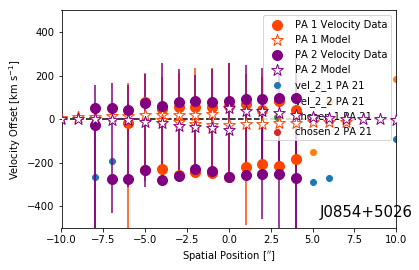

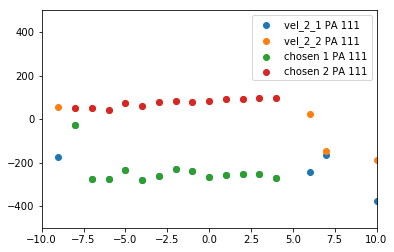

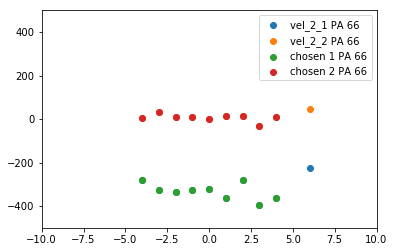

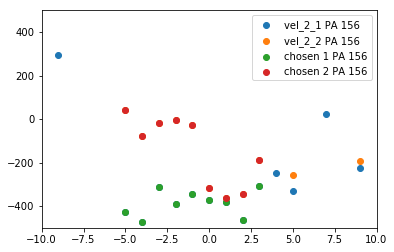

assy_error [[60.792078367, 29.276040068300006, 23.8056886096, 9.073096162799999, 8.387015118599997, 4.692570881599998, 9.227459759599995, 143.8576150096, 2.3353138272999985, 13.608557078900006, 49.95482825133, -77.1149615710001, 49.99370865199998, 64.500054573, 21.932303999999988, 20.508875558, 25.51842849800002, 18.10882816100002, 267.646783783, 45.320028500999996, 25.326146672999982, 41.569448362], [103.7650337505, 18.14188821319999, 3.5821427524999976, 5.934803476399999, 3.765976590000001, 6.469863873000001, 4.467857907499997, 2.399538384100012, 20.4953348727, 13.067430815199998, -13.796235313300002, 842.39132252, 445.595332713, 422.653243369, 469.45860169, 479.21414488000005, 484.599091462, 523.133169073, 425.719142958, 400.395861133, 407.45324047500003, 372.89929745300003]] 22
22 22 2


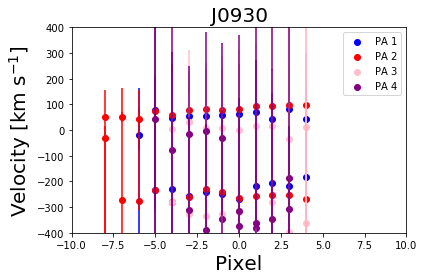

In [21]:
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *                        
import math
from mpl_toolkits.mplot3d import Axes3D
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TIME TO DO THE BICONE





name='J0930'
if name=='J0930':
    PA_1='Liu032_PA21, J0930_table_contfitcoords_outflow_J0930_star.txt'
    PA_2='Liu032_PA111, J0930_table_contfitcoords_outflow_J0930_star.txt'
    PA_3='Liu032_PA66, J0930_table_contfitcoords_outflow_J0930_star.txt'
    PA_4='Liu032_PA156, J0930_table_contfitcoords_outflow_J0930_star.txt'
    
    pixelscale_1=0.389
    pixelscale_2=0.389
    pixelscale_3=0.42
    pixelscale_4=0.42
    
    slitwidth=1.5
    
    PA1=21
    PA2=111
    PA3=66
    PA4=156
    
    
    lower_lim=14
    upper_lim=25
    lower_lim_ortho=12#ws 7
    upper_lim_ortho=25
    lower_lim_66=16#ws 7
    upper_lim_66=25
    lower_lim_156=15#ws 7
    upper_lim_156=24
    
    slitwidth=1.5
    pixelscale=0.42
    
    #pixelscale=0.1
    minus_one=0
    low_1=0
    low_2=0
    up_1=20
    up_2=20

    


with open(PA_1, 'r') as f:
    data = f.readlines()
    title=[]
    col_1=[]
    col_2=[]
    col_3=[]
    col_1_1=[]
    col_1_2=[]
    col_1_3=[]
    col_2_1=[]
    col_2_2=[]
    col_2_3=[]

    for line in data:
        words = line.split()
        if words[0]=='Vel':
            title.append(words[0])
            col_1.append(words[1])
            col_2.append(words[3])
            col_3.append(words[4])
        if words[0]=='Veltwoone':
            col_1_1.append(words[1])
            col_1_2.append(words[3])
            col_1_3.append(words[4])
        if words[0]=='Veltwotwo':
            col_2_1.append(words[1])
            col_2_2.append(words[3])
            col_2_3.append(words[4])
            

vel_1_gauss=[]
vel_1_error_up=[]
vel_1_error_down=[]
vel_1_error=[]

vel_2_1_gauss=[]
vel_2_1_error_up=[]
vel_2_1_error_down=[]
vel_2_1_error=[]

vel_2_2_gauss=[]
vel_2_2_error_up=[]
vel_2_2_error_down=[]
vel_2_2_error=[]

for j in range(len(col_1)):
    if j < 40:
        vel_1_gauss.append(col_1[j])
        vel_1_error_up.append(float(col_2[j])-float(col_1[j]))
        vel_1_error_down.append(float(col_1[j])-float(col_3[j]))
        vel_1_error.append([float(col_2[j])-float(col_1[j]),float(col_1[j])-float(col_3[j])])
        
        vel_2_1_gauss.append(col_1_1[j])
        vel_2_1_error_up.append(float(col_1_2[j])-float(col_1_1[j]))
        vel_2_1_error_down.append(float(col_1_1[j])-float(col_1_3[j]))
        vel_2_1_error.append([float(col_1_2[j])-float(col_1_1[j]),float(col_1_1[j])-float(col_1_3[j])])
        
        vel_2_2_gauss.append(col_2_1[j])
        vel_2_2_error_up.append(float(col_2_2[j])-float(col_2_1[j]))
        vel_2_2_error_down.append(float(col_2_1[j])-float(col_2_3[j]))
        vel_2_2_error.append([float(col_2_2[j])-float(col_2_1[j]),float(col_2_1[j])-float(col_2_3[j])])

        
with open(PA_2, 'r') as f:
    data = f.readlines()
    title=[]
    col_1=[]
    col_2=[]
    col_3=[]
    col_1_1=[]
    col_1_2=[]
    col_1_3=[]
    col_2_1=[]
    col_2_2=[]
    col_2_3=[]

    for line in data:
        words = line.split()
        if words[0]=='Vel':
            title.append(words[0])
            col_1.append(words[1])
            col_2.append(words[3])
            col_3.append(words[4])
        if words[0]=='Veltwoone':
            col_1_1.append(words[1])
            col_1_2.append(words[3])
            col_1_3.append(words[4])
        if words[0]=='Veltwotwo':
            col_2_1.append(words[1])
            col_2_2.append(words[3])
            col_2_3.append(words[4])
            

vel_1_gauss_ortho=[]
vel_1_error_ortho_up=[]
vel_1_error_ortho_down=[]
vel_1_error_ortho=[]

vel_2_1_gauss_ortho=[]
vel_2_1_error_ortho_up=[]
vel_2_1_error_ortho_down=[]
vel_2_1_error_ortho=[]

vel_2_2_gauss_ortho=[]
vel_2_2_error_ortho_up=[]
vel_2_2_error_ortho_down=[]
vel_2_2_error_ortho=[]

for j in range(len(col_1)):
    if j < 40:
        vel_1_gauss_ortho.append(col_1[j])
        vel_1_error_ortho_up.append(float(col_2[j])-float(col_1[j]))
        vel_1_error_ortho_down.append(float(col_1[j])-float(col_3[j]))
        vel_1_error_ortho.append([float(col_2[j])-float(col_1[j]),float(col_1[j])-float(col_3[j])])
        
        vel_2_1_gauss_ortho.append(col_1_1[j])
        vel_2_1_error_ortho_up.append(float(col_1_2[j])-float(col_1_1[j]))
        vel_2_1_error_ortho_down.append(float(col_1_1[j])-float(col_1_3[j]))
        vel_2_1_error_ortho.append([float(col_1_2[j])-float(col_1_1[j]),float(col_1_1[j])-float(col_1_3[j])])
        
        vel_2_2_gauss_ortho.append(col_2_1[j])
        vel_2_2_error_ortho_up.append(float(col_2_2[j])-float(col_2_1[j]))
        vel_2_2_error_ortho_down.append(float(col_2_1[j])-float(col_2_3[j]))
        vel_2_2_error_ortho.append([float(col_2_2[j])-float(col_2_1[j]),float(col_2_1[j])-float(col_2_3[j])])

        
        
with open(PA_3, 'r') as f:
    data = f.readlines()
    title=[]
    col_1=[]
    col_2=[]
    col_3=[]
    col_1_1=[]
    col_1_2=[]
    col_1_3=[]
    col_2_1=[]
    col_2_2=[]
    col_2_3=[]

    for line in data:
        words = line.split()
        if words[0]=='Vel':
            title.append(words[0])
            col_1.append(words[1])
            col_2.append(words[3])
            col_3.append(words[4])
        if words[0]=='Veltwoone':
            col_1_1.append(words[1])
            col_1_2.append(words[3])
            col_1_3.append(words[4])
        if words[0]=='Veltwotwo':
            col_2_1.append(words[1])
            col_2_2.append(words[3])
            col_2_3.append(words[4])
            

vel_1_gauss_66=[]
vel_1_error_66_up=[]
vel_1_error_66_down=[]
vel_1_error_66=[]

vel_2_1_gauss_66=[]
vel_2_1_error_66_up=[]
vel_2_1_error_66_down=[]
vel_2_1_error_66=[]

vel_2_2_gauss_66=[]
vel_2_2_error_66_up=[]
vel_2_2_error_66_down=[]
vel_2_2_error_66=[]

for j in range(len(col_1)):
    if j < 40:
        vel_1_gauss_66.append(col_1[j])
        vel_1_error_66_up.append(float(col_2[j])-float(col_1[j]))
        vel_1_error_66_down.append(float(col_1[j])-float(col_3[j]))
        vel_1_error_66.append([float(col_2[j])-float(col_1[j]),float(col_1[j])-float(col_3[j])])
        
        vel_2_1_gauss_66.append(col_1_1[j])
        vel_2_1_error_66_up.append(float(col_1_2[j])-float(col_1_1[j]))
        vel_2_1_error_66_down.append(float(col_1_1[j])-float(col_1_3[j]))
        vel_2_1_error_66.append([float(col_1_2[j])-float(col_1_1[j]),float(col_1_1[j])-float(col_1_3[j])])
        
        vel_2_2_gauss_66.append(col_2_1[j])
        vel_2_2_error_66_up.append(float(col_2_2[j])-float(col_2_1[j]))
        vel_2_2_error_66_down.append(float(col_2_1[j])-float(col_2_3[j]))
        vel_2_2_error_66.append([float(col_2_2[j])-float(col_2_1[j]),float(col_2_1[j])-float(col_2_3[j])])

with open(PA_4, 'r') as f:
    data = f.readlines()
    title=[]
    col_1=[]
    col_2=[]
    col_3=[]
    col_1_1=[]
    col_1_2=[]
    col_1_3=[]
    col_2_1=[]
    col_2_2=[]
    col_2_3=[]

    for line in data:
        words = line.split()
        if words[0]=='Vel':
            title.append(words[0])
            col_1.append(words[1])
            col_2.append(words[3])
            col_3.append(words[4])
        if words[0]=='Veltwoone':
            col_1_1.append(words[1])
            col_1_2.append(words[3])
            col_1_3.append(words[4])
        if words[0]=='Veltwotwo':
            col_2_1.append(words[1])
            col_2_2.append(words[3])
            col_2_3.append(words[4])
            

vel_1_gauss_156=[]
vel_1_error_156_up=[]
vel_1_error_156_down=[]
vel_1_error_156=[]

vel_2_1_gauss_156=[]
vel_2_1_error_156_up=[]
vel_2_1_error_156_down=[]
vel_2_1_error_156=[]

vel_2_2_gauss_156=[]
vel_2_2_error_156_up=[]
vel_2_2_error_156_down=[]
vel_2_2_error_156=[]

for j in range(len(col_1)):
    if j < 40:
        vel_1_gauss_156.append(col_1[j])
        vel_1_error_156_up.append(float(col_2[j])-float(col_1[j]))
        vel_1_error_156_down.append(float(col_1[j])-float(col_3[j]))
        vel_1_error_156.append([float(col_2[j])-float(col_1[j]),float(col_1[j])-float(col_3[j])])
        
        vel_2_1_gauss_156.append(col_1_1[j])
        vel_2_1_error_156_up.append(float(col_1_2[j])-float(col_1_1[j]))
        vel_2_1_error_156_down.append(float(col_1_1[j])-float(col_1_3[j]))
        vel_2_1_error_156.append([float(col_1_2[j])-float(col_1_1[j]),float(col_1_1[j])-float(col_1_3[j])])
        
        vel_2_2_gauss_156.append(col_2_1[j])
        vel_2_2_error_156_up.append(float(col_2_2[j])-float(col_2_1[j]))
        vel_2_2_error_156_down.append(float(col_2_1[j])-float(col_2_3[j]))
        vel_2_2_error_156.append([float(col_2_2[j])-float(col_2_1[j]),float(col_2_1[j])-float(col_2_3[j])])


        
xs_data=np.linspace(0, len(vel_1_gauss)-1, len(vel_1_gauss))

xs_data=xs_data-len(xs_data)/2

low_21=15
high_21=25

low_111=13
high_111=25

low_66=16
high_66=24

low_156=16
high_156=24

xs_data=[float(y) for y in xs_data]
vel_1=[float(y) for y in vel_1_gauss]
vel_2_1=[float(y) for y in vel_2_1_gauss]
vel_2_2=[float(y) for y in vel_2_2_gauss]
#vel_1_error=[float(y) for y in vel_1_error]

xs_data=[float(y) for y in xs_data]
vel_1_ortho=[float(y) for y in vel_1_gauss_ortho]
vel_2_1_ortho=[float(y) for y in vel_2_1_gauss_ortho]
vel_2_2_ortho=[float(y) for y in vel_2_2_gauss_ortho]

vel_1_66=[float(y) for y in vel_1_gauss_66]
vel_2_1_66=[float(y) for y in vel_2_1_gauss_66]
vel_2_2_66=[float(y) for y in vel_2_2_gauss_66]

vel_1_156=[float(y) for y in vel_1_gauss_156]
vel_2_1_156=[float(y) for y in vel_2_1_gauss_156]
vel_2_2_156=[float(y) for y in vel_2_2_gauss_156]
#vel_1_error_ortho=[float(y) for y in vel_1_error_ortho]

plt.scatter(xs_data, vel_2_1, label='vel_2_1 PA 21')
plt.scatter(xs_data, vel_2_2, label='vel_2_2 PA 21')
plt.scatter(xs_data[lower_lim:upper_lim], vel_2_1[lower_lim:upper_lim], label='chosen 1 PA 21')
plt.scatter(xs_data[lower_lim:upper_lim], vel_2_2[lower_lim:upper_lim], label='chosen 2 PA 21')
plt.legend()
plt.xlim([-10,10])
plt.ylim([-500,500])
plt.show()

plt.scatter(xs_data, vel_2_1_ortho, label='vel_2_1 PA 111')
plt.scatter(xs_data, vel_2_2_ortho, label='vel_2_2 PA 111')
plt.scatter(xs_data[lower_lim_ortho:upper_lim_ortho], vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho], label='chosen 1 PA 111')
plt.scatter(xs_data[lower_lim_ortho:upper_lim_ortho], vel_2_2_ortho[lower_lim_ortho:upper_lim_ortho], label='chosen 2 PA 111')
plt.legend()
plt.xlim([-10,10])
plt.ylim([-500,500])
plt.show()



plt.scatter(xs_data, vel_2_1_66, label='vel_2_1 PA 66')
plt.scatter(xs_data, vel_2_2_66, label='vel_2_2 PA 66')
plt.scatter(xs_data[lower_lim_66:upper_lim_66], vel_2_1_66[lower_lim_66:upper_lim_66], label='chosen 1 PA 66')
plt.scatter(xs_data[lower_lim_66:upper_lim_66], vel_2_2_66[lower_lim_66:upper_lim_66], label='chosen 2 PA 66')
plt.legend()
plt.xlim([-10,10])
plt.ylim([-500,500])
plt.show()



plt.scatter(xs_data, vel_2_1_156, label='vel_2_1 PA 156')
plt.scatter(xs_data, vel_2_2_156, label='vel_2_2 PA 156')
plt.scatter(xs_data[lower_lim_156:upper_lim_156], vel_2_1_156[lower_lim_156:upper_lim_156], label='chosen 1 PA 156')
plt.scatter(xs_data[lower_lim_156:upper_lim_156], vel_2_2_156[lower_lim_156:upper_lim_156], label='chosen 2 PA 156')
plt.legend()
plt.xlim([-10,10])
plt.ylim([-500,500])
plt.show()
        
'''
        
xs_data=[float(y) for y in xs_data]
vel_2_1=[float(y) for y in vel_2_1]
vel_2_2=[float(y) for y in vel_2_2]
vel_2_1_ortho=[float(y) for y in vel_2_1_ortho]
vel_2_2_ortho=[float(y) for y in vel_2_2_ortho]
vel_2_1_error=[float(y) for y in vel_2_1_error]
vel_2_2_error=[float(y) for y in vel_2_2_error]
vel_2_1_ortho_error=[float(y) for y in vel_2_1_error_ortho]
vel_2_2_ortho_error=[float(y) for y in vel_2_2_error_ortho]
#(xs_data[lower_lim:upper_lim],vel_2_1[lower_lim:upper_lim]
if np.mean(vel_2_1[lower_lim:upper_lim])< np.mean(vel_2_1[lower_lim:upper_lim]):
    #this means that the first set is the above side
    v_1_above=vel_2_1[lower_lim:upper_lim]
    v_1_below=vel_2_2[lower_lim:upper_lim]
    vel_data_concat=vel_2_1[lower_lim:upper_lim]+vel_2_2[lower_lim:upper_lim]
    error_data_concat=vel_2_1_error[lower_lim:upper_lim]+vel_2_2_error[lower_lim:upper_lim]
else:
    v_1_above=vel_2_2[lower_lim:upper_lim]
    v_1_below=vel_2_1[lower_lim:upper_lim]
    vel_data_concat=vel_2_2[lower_lim:upper_lim]+vel_2_1[lower_lim:upper_lim]
    error_data_concat=vel_2_2_error[lower_lim:upper_lim]+vel_2_1_error[lower_lim:upper_lim]

if np.mean(vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho])< np.mean(vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho]):
    #this means that the first set is the above side
    v_2_above=vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho]
    v_2_below=vel_2_2_ortho[lower_lim_ortho:upper_lim_ortho]
    vel_data_concat_ortho=vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho]+vel_2_2_ortho[lower_lim_ortho:upper_lim_ortho]
    error_data_concat_ortho=vel_2_1_ortho_error[lower_lim_ortho:upper_lim_ortho]+vel_2_2_ortho_error[lower_lim_ortho:upper_lim_ortho]
else:
    v_2_above=vel_2_2_ortho[lower_lim_ortho:upper_lim_ortho]
    v_2_below=vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho]
    vel_data_concat_ortho=vel_2_2_ortho[lower_lim_ortho:upper_lim_ortho]+vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho]
    error_data_concat_ortho=vel_2_2_ortho_error[lower_lim_ortho:upper_lim_ortho]+vel_2_1_ortho_error[lower_lim_ortho:upper_lim_ortho]


xs_data_cut=xs_data[lower_lim:upper_lim]
xs_data_concat=xs_data_cut+xs_data_cut
xs_data_cut_ortho= xs_data[lower_lim_ortho:upper_lim_ortho]
xs_data_concat_ortho=xs_data_cut_ortho+xs_data_cut_ortho



for i in xrange(len(error_data_concat)):
    if error_data_concat[i]==0.0:
        error_data_concat[i]=1000
for i in xrange(len(error_data_concat_ortho)):
    if error_data_concat_ortho[i]==0.0:
        error_data_concat_ortho[i]=1000


plt.ylabel( r'Velocity [km s$^{-1}$]',  size=20)
plt.xlabel(r'Pixel', size=20)
plt.title(str(name), size=20)

plt.errorbar(xs_data_concat, vel_data_concat,yerr=error_data_concat, color='blue',linestyle='None')
plt.errorbar(xs_data_concat_ortho, vel_data_concat_ortho,yerr=error_data_concat_ortho, color='red', linestyle='None')
plt.scatter(xs_data_concat, vel_data_concat, color='blue', label='PA 1')
plt.scatter(xs_data_concat_ortho, vel_data_concat_ortho, color='red', label='PA 2')
plt.legend()
#plt.ylim([-400,400])
plt.tight_layout()
#savefig('../J0009_errors_before.pdf')
plt.show()
'''


if np.mean(vel_2_1[lower_lim:upper_lim])< np.mean(vel_2_1[lower_lim:upper_lim]):
    #this means that the first set is the above side
    v_1_above=vel_2_1[lower_lim:upper_lim]
    v_1_below=vel_2_2[lower_lim:upper_lim]
    vel_data_concat=vel_2_1[lower_lim:upper_lim]+vel_2_2[lower_lim:upper_lim]
    vel_error_up_concat=vel_2_1_error_up[lower_lim:upper_lim]+vel_2_2_error_up[lower_lim:upper_lim]
    vel_error_down_concat=vel_2_1_error_down[lower_lim:upper_lim]+vel_2_2_error_down[lower_lim:upper_lim]
    #error_data_concat=vel_2_1_error[lower_lim:upper_lim]+vel_2_2_error[lower_lim:upper_lim]
else:
    v_1_above=vel_2_2[lower_lim:upper_lim]
    v_1_below=vel_2_1[lower_lim:upper_lim]
    vel_data_concat=vel_2_2[lower_lim:upper_lim]+vel_2_1[lower_lim:upper_lim]
    vel_error_up_concat=vel_2_2_error_up[lower_lim:upper_lim]+vel_2_1_error_up[lower_lim:upper_lim]
    vel_error_down_concat=vel_2_2_error_down[lower_lim:upper_lim]+vel_2_1_error_down[lower_lim:upper_lim]
    #error_data_concat=vel_2_2_error[lower_lim:upper_lim]+vel_2_1_error[lower_lim:upper_lim]

if np.mean(vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho])< np.mean(vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho]):
    #this means that the first set is the above side
    v_2_above=vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho]
    v_2_below=vel_2_2_ortho[lower_lim_ortho:upper_lim_ortho]
    vel_data_concat_ortho=vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho]+vel_2_2_ortho[lower_lim_ortho:upper_lim_ortho]
    vel_error_ortho_up_concat=vel_2_1_error_ortho_up[lower_lim_ortho:upper_lim_ortho]+vel_2_2_error_ortho_up[lower_lim_ortho:upper_lim_ortho]
    vel_error_ortho_down_concat=vel_2_1_error_ortho_down[lower_lim_ortho:upper_lim_ortho]+vel_2_2_error_ortho_down[lower_lim_ortho:upper_lim_ortho]
    #error_data_concat_ortho=vel_2_1_ortho_error[lower_lim_ortho:upper_lim_ortho]+vel_2_2_ortho_error[lower_lim_ortho:upper_lim_ortho]
else:
    v_2_above=vel_2_2_ortho[lower_lim_ortho:upper_lim_ortho]
    v_2_below=vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho]
    vel_data_concat_ortho=vel_2_2_ortho[lower_lim_ortho:upper_lim_ortho]+vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho]
    vel_error_ortho_up_concat=vel_2_2_error_ortho_up[lower_lim_ortho:upper_lim_ortho]+vel_2_1_error_ortho_up[lower_lim_ortho:upper_lim_ortho]
    vel_error_ortho_down_concat=vel_2_2_error_ortho_down[lower_lim_ortho:upper_lim_ortho]+vel_2_1_error_ortho_down[lower_lim_ortho:upper_lim_ortho]

if np.mean(vel_2_1_66[lower_lim_66:upper_lim_66])< np.mean(vel_2_1_66[lower_lim_66:upper_lim_66]):
    #this means that the first set is the above side
    v_2_above=vel_2_1_66[lower_lim_66:upper_lim_66]
    v_2_below=vel_2_2_66[lower_lim_66:upper_lim_66]
    vel_data_concat_66=vel_2_1_66[lower_lim_66:upper_lim_66]+vel_2_2_66[lower_lim_66:upper_lim_66]
    vel_error_66_up_concat=vel_2_1_error_66_up[lower_lim_66:upper_lim_66]+vel_2_2_error_66_up[lower_lim_66:upper_lim_66]
    vel_error_66_down_concat=vel_2_1_error_66_down[lower_lim_66:upper_lim_66]+vel_2_2_error_66_down[lower_lim_66:upper_lim_66]
    #error_data_concat_ortho=vel_2_1_ortho_error[lower_lim_ortho:upper_lim_ortho]+vel_2_2_ortho_error[lower_lim_ortho:upper_lim_ortho]
else:
    v_2_above=vel_2_2_66[lower_lim_66:upper_lim_66]
    v_2_below=vel_2_1_66[lower_lim_66:upper_lim_66]
    vel_data_concat_66=vel_2_2_66[lower_lim_66:upper_lim_66]+vel_2_1_66[lower_lim_66:upper_lim_66]
    vel_error_66_up_concat=vel_2_2_error_66_up[lower_lim_66:upper_lim_66]+vel_2_1_error_66_up[lower_lim_66:upper_lim_66]
    vel_error_66_down_concat=vel_2_2_error_66_down[lower_lim_66:upper_lim_66]+vel_2_1_error_66_down[lower_lim_66:upper_lim_66]
    
if np.mean(vel_2_1_156[lower_lim_156:upper_lim_156])< np.mean(vel_2_1_156[lower_lim_156:upper_lim_156]):
    #this means that the first set is the above side
    v_2_above=vel_2_1_156[lower_lim_156:upper_lim_156]
    v_2_below=vel_2_2_156[lower_lim_156:upper_lim_156]
    vel_data_concat_156=vel_2_1_156[lower_lim_156:upper_lim_156]+vel_2_2_156[lower_lim_156:upper_lim_156]
    vel_error_156_up_concat=vel_2_1_error_156_up[lower_lim_156:upper_lim_156]+vel_2_2_error_156_up[lower_lim_156:upper_lim_156]
    vel_error_156_down_concat=vel_2_1_error_156_down[lower_lim_156:upper_lim_156]+vel_2_2_error_156_down[lower_lim_156:upper_lim_156]
    #error_data_concat_ortho=vel_2_1_ortho_error[lower_lim_ortho:upper_lim_ortho]+vel_2_2_ortho_error[lower_lim_ortho:upper_lim_ortho]
else:
    v_2_above=vel_2_2_156[lower_lim_156:upper_lim_156]
    v_2_below=vel_2_1_156[lower_lim_156:upper_lim_156]
    vel_data_concat_156=vel_2_2_156[lower_lim_156:upper_lim_156]+vel_2_1_156[lower_lim_156:upper_lim_156]
    vel_error_156_up_concat=vel_2_2_error_156_up[lower_lim_156:upper_lim_156]+vel_2_1_error_156_up[lower_lim_156:upper_lim_156]
    vel_error_156_down_concat=vel_2_2_error_156_down[lower_lim_156:upper_lim_156]+vel_2_1_error_156_down[lower_lim_156:upper_lim_156]
    
    #error_data_concat_ortho=vel_2_2_ortho_error[lower_lim_ortho:upper_lim_ortho]+vel_2_1_ortho_error[lower_lim_ortho:upper_lim_ortho]


xs_data_cut=xs_data[lower_lim:upper_lim]
xs_data_concat=xs_data_cut+xs_data_cut
xs_data_concat=[int(x) for x in xs_data_concat]

xs_data_cut_ortho= xs_data[lower_lim_ortho:upper_lim_ortho]
xs_data_concat_ortho=xs_data_cut_ortho+xs_data_cut_ortho
xs_data_concat_ortho=[int(x) for x in xs_data_concat_ortho]

xs_data_cut_66=xs_data[lower_lim_66:upper_lim_66]
xs_data_concat_66=xs_data_cut_66+xs_data_cut_66
xs_data_concat_66=[int(x) for x in xs_data_concat_66]

xs_data_cut_156=xs_data[lower_lim_156:upper_lim_156]
xs_data_concat_156=xs_data_cut_156+xs_data_cut_156
xs_data_concat_156=[int(x) for x in xs_data_concat_156]




xs_data_concat_arc=[pixelscale_1*y for y in xs_data_concat]
xs_data_concat_ortho_arc=[pixelscale_2*y for y in xs_data_concat_ortho]
xs_data_concat_66_arc=[pixelscale_3*y for y in xs_data_concat_66]
xs_data_concat_156_arc=[pixelscale_4*y for y in xs_data_concat_156]




#assy_error=[vel_1_error_down[lower_lim:upper_lim],vel_1_error_up[lower_lim:upper_lim]]
#assy_error_ortho=[vel_1_error_ortho_down[lower_lim_ortho:upper_lim_ortho],vel_1_error_ortho_up[lower_lim_ortho:upper_lim_ortho]]

assy_error=[vel_error_down_concat,vel_error_up_concat]
assy_error_ortho=[vel_error_ortho_down_concat,vel_error_ortho_up_concat]
assy_error_66=[vel_error_66_down_concat,vel_error_66_up_concat]
assy_error_156=[vel_error_156_down_concat,vel_error_156_up_concat]


#error_data_concat=[vel_1_error_down[lower_lim:upper_lim],vel_1_error_up[lower_lim:upper_lim]]
#error_data_concat_ortho=[vel_1_error_ortho_down[lower_lim_ortho:upper_lim_ortho],vel_1_error_ortho_up[lower_lim_ortho:upper_lim_ortho]]
error_data_concat=assy_error
error_data_concat_ortho=assy_error_ortho
error_data_concat_66=assy_error_66
error_data_concat_156=assy_error_156

print('assy_error',assy_error, len(assy_error[0]))

plt.ylabel( r'Velocity [km s$^{-1}$]',  size=20)
plt.xlabel(r'Pixel', size=20)
plt.title(str(name), size=20)

print(len(xs_data_concat), len(vel_data_concat), len(assy_error))

plt.errorbar(xs_data_concat, vel_data_concat,yerr=assy_error, color='blue',linestyle='None')#error_data_concat,
plt.errorbar(xs_data_concat_ortho, vel_data_concat_ortho,yerr=assy_error_ortho, color='red', linestyle='None')
plt.scatter(xs_data_concat, vel_data_concat, color='blue', label='PA 1')
plt.scatter(xs_data_concat_ortho, vel_data_concat_ortho, color='red', label='PA 2')

plt.errorbar(xs_data_concat_66, vel_data_concat_66,yerr=assy_error_66, color='pink',linestyle='None')#error_data_concat,
plt.errorbar(xs_data_concat_156, vel_data_concat_156,yerr=assy_error_156, color='purple', linestyle='None')
plt.scatter(xs_data_concat_66, vel_data_concat_66, color='pink', label='PA 3')
plt.scatter(xs_data_concat_156, vel_data_concat_156, color='purple', label='PA 4')
plt.legend()
plt.ylim([-400,400])
plt.xlim([-10,10])
plt.tight_layout()
#savefig('../J0009_errors_before.pdf')
plt.show()





#bicone only
'''theta_half, h(depends on r_t), PA (do for radio = OIII), i, v_max, r_t)'''
'''1. fit the rotating disks to the objects
   2. double peaked - modeling for bicones is new, use your velocity peaks
   3. use both position angles wherever you can'''
import timeit
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
#from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *                        
import math
from mpl_toolkits.mplot3d import Axes3D
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TIME TO DO THE BICONE


clf()

name_list=['Liu002_J0009','Liu014_J0803','Liu018_J0821','Liu026_J0854','Liu032_J0930','Liu040_J0959',
           'Liu052_J1027','Liu063_J1110','Liu085_J1152','Liu107_J1315','Liu114_J1328','Wang062_J1352',
           'Wang063_J1420','Liu139_J1524','Wang072_J1526','Wang080_J1606','Liu153_J1630','Liu159_J1720']
name_list=['Liu052_J1027','Liu014_J0803','Liu026_J0854']
#name_list=['Liu014_J0803']
name_list=['Liu026_J0854']
for i in xrange(len(name_list)):
    name=name_list[i]
    minus_one=0
  
  
    
 
    
    if name=='Liu052_J1027':
        PA_1='Liu052_PA75, J1028_table_contfitcoords_outflow.txt'
        PA_2='Liu052_PA165, J1028_table_contfitcoords_outflow.txt'
        PA1=75
        PA2=165
        lower_lim=15
        upper_lim=24
        lower_lim_ortho=15
        upper_lim_ortho=24
        low_1=0
        up_1=9
        low_2=0
        up_2=9
        pixelscale=0.42
        slitwidth=1.5
        minus_one=1
        result_a =  78.73 , 54.84 , 3.68 , 38.05 , 80.76 , 594.09
        
        result_n =  77.1 , 32.02 , 11.77 , 33.05 , 60.81 , 536.38#orig
        result_n =  77.38 , 32.22 , 10.72 , 31.55 , 60.76 , 527.88
        result_s =  71.62 , 43.18 , 9.55 , 42.58 , 481.2
        
    if name=='Wang063_J1420':
        PA_1='Wang063_PA79, J1420_table_contfitcoords_outflow.txt'
        PA_2='Wang063_PA169, J1420_table_contfitcoords_outflow.txt'
        PA1=79
        PA2=169
        lower_lim=17
        upper_lim=24
        lower_lim_ortho=16
        upper_lim_ortho=25
        
        low_1=1
        up_1=8
        low_2=0
        up_2=10
        pixelscale=0.42
        slitwidth=1.5
        result_a =  73.18 , 35.97 , 2.78 , 44.97 , 82.13 , 412.04
        result_n =  78.52 , 173.81 , 5.29 , 40.86 , 70.21 , 388.9
        result_s =  80.33 , 42.42 , 4.5 , 59.08 , 251.86
    
    if name=='Liu139_J1524':
        PA_1='Liu139_PA12, J1524_table_contfitcoords_outflow.txt'
        PA_2='Liu139_PA102, J1524_table_contfitcoords_outflow.txt'
        PA1=12
        PA2=102
        lower_lim=15
        upper_lim=26
        lower_lim_ortho=15
        upper_lim_ortho=26
        
        low_1=0
        up_1=20
        low_2=0
        up_2=20
        pixelscale=0.42
        slitwidth=1.5
        result_a =  72.97 , 49.86 , 4.14 , 36.43 , 80.75 , 758.74
        result_n =  84.72 , 101.26 , 8.5 , 26.17 , 59.62 , 697.43#orig
        result_n =  85.25 , 100.58 , 8.67 , 26.45 , 60.5 , 741.8#oop
        result_s =  35.1 , 46.41 , 1.01 , 75.26 , 524.28
        
        
        result_a =  49.41 , 53.12 , 5.77 , 51.67 , 79.37 , 588.95
        result_n =  82.78 , 100.45 , 5.17 , 34.79 , 61.77 , 721.98
        result_s =  33.84 , 32.22 , 0.99 , 71.45 , 610.63
    
    if name=='Wang072_J1526':
        PA_1='Wang072_PA38, J1526_table_contfitcoords_outflow_three.txt'
        PA_2='Wang072_PA128, J1526_table_contfitcoords_outflow_three.txt'
        PA1=38
        PA2=128
        lower_lim=14
        upper_lim=24
        lower_lim_ortho=14
        upper_lim_ortho=25
        
        low_1=0
        up_1=10
        low_2=0
        up_2=20
        pixelscale=0.42
        slitwidth=1.5
        minus_one=1
        result_a =  71.68 , 85.17 , 10.33 , 44.66 , 66.07 , 401.95
        result_n =  73.72 , 59.31 , 10.22 , 43.99 , 62.34 , 410.83
        result_s =  6.32 , 91.87 , 10.53 , 49.3 , 568.89
    
    if name=='Liu114_J1328':
        PA_1='Liu114_PA39, J1328_table_contfitcoords_outflow.txt'
        PA_2='Liu114_PA129, J1328_table_contfitcoords_outflow.txt'
        PA1=39
        PA2=129
        lower_lim=16
        upper_lim=25
        lower_lim_ortho=16
        upper_lim_ortho=25
        
        low_1=0
        up_1=20
        low_2=0
        up_2=20
        pixelscale=0.42
        slitwidth=1.5
        result_a =  78.31 , 52.13 , 5.65 , 47.5 , 80.85 , 233.38
        result_n =  76.53 , 43.74 , 5.5 , 47.46 , 80.47 , 298.14
        result_s =  29.78 , 11.17 , 1.41 , 76.98 , 187.02
    
    if name=='Liu107_J1315':
        PA_1='Liu107_PA74, J1315_table_contfitcoords_outflow.txt'
        PA_2='Liu107_PA164, J1315_table_contfitcoords_outflow_three.txt'
        PA1=74
        PA2=164
        lower_lim=17
        upper_lim=24
        lower_lim_ortho=17
        upper_lim_ortho=24
        
        low_1=0
        up_1=40
        low_2=0
        up_2=40
        pixelscale=0.42
        slitwidth=1.5
        result_a =  58.43 , 39.36 , 5.71 , 48.3 , 78.21 , 603.68
        result_n =  55.27 , 46.84 , 5.69 , 46.47 , 76.77 , 576.03
        result_s =  36.73 , 23.52 , 6.73 , 57.99 , 335.4
        
        #minus_one=1
    
    if name=='Liu159_J1720':
        PA_1='Liu159_PA152, J1720_table_cont.txt'
        PA_2='Liu159_PA242, J1720_table_cont.txt'
        PA1=152-90
        PA2=242-90
        lower_lim=14
        upper_lim=25
        lower_lim_ortho=12
        upper_lim_ortho=33
        
        low_1=6
        up_1=17
        low_2=4
        up_2=40
        pixelscale=0.1185
        slitwidth=1.0
        result_a =  78.84 , 37.73 , 5.63 , 46.98 , 82.55 , 425.04
        result_n =  83.61 , 33.85 , 13.79 , 17.71 , 30.46 , 302.33
        result_s =  32.36 , 21.08 , 9.95 , 44.65 , 391.05
        #minus_one=1
    
    
    if name=='Liu153_J1630':
        PA_1='Liu153_PA63, J1631_table_cont.txt'
        PA_2='Liu153_PA156, J1631_table_cont.txt'
        PA1=63
        PA2=153
        lower_lim=15
        upper_lim=29
        lower_lim_ortho=10
        upper_lim_ortho=26
        
        low_1=5
        up_1=21
        low_2=0
        up_2=16
        pixelscale=0.1185
        slitwidth=1.0
        minus_one=1
        result_a =  82.6 , 37.84 , 5.9 , 40.21 , 81.93 , 291.16
        result_n =  87.81 , 11.26 , 9.56 , 58.83 , 61.83 , 431.82
        result_s =  49.48 , 2.84 , 7.76 , 59.25 , 435.27
    
    if name=='Wang080_J1606':
        PA_1='Wang080_PA17, J1606_table_cont.txt'
        PA_2='Wang080_PA107, J1606_table_cont.txt'
        PA1=17
        PA2=107
        lower_lim=10
        upper_lim=26
        lower_lim_ortho=10
        upper_lim_ortho=26
        
        lower_lim=11
        upper_lim=30
        lower_lim_ortho=11
        upper_lim_ortho=26
        
        low_1=0
        up_1=40
        low_2=0
        up_2=15
        pixelscale=0.1185
        slitwidth=1.0
        result_a =  83.32 , 89.58 , 7.26 , 38.73 , 78.73 , 384.44
        result_n =  80.82 , 113.77 , 8.75 , 36.65 , 74.0 , 374.26
        result_s =  25.78 , 43.89 , 10.21 , 52.82 , 387.62
        #minus_one=1
    
   
    
    if name=='Wang062_J1352':
        PA_1='Wang062_PA162, J1352_table_cont.txt'
        PA_2='Wang062_PA252, J1352_table_cont.txt'
        PA1=162-90
        PA2=252-90
        lower_lim=10
        upper_lim=32
        lower_lim_ortho=14
        upper_lim_ortho=25
        
        low_1=1
        up_1=23
        low_2=5
        up_2=16
        pixelscale=0.1185
        slitwidth=1.0
        result_a =  43.0 , 42.66 , 6.47 , 60.95 , 78.0 , 436.84
        result_n =  51.24 , 49.71 , 7.59 , 59.46 , 77.39 , 395.05
        result_s =  44.02 , 18.39 , 4.83 , 61.92 , 355.59
    
   
    
    
        
        
    if name=='Liu085_J1152':
        PA_1='Liu085_PA17, J1152_table_contfitcoords_outflow.txt'
        PA_2='Liu085_PA107, J1152_table_contfitcoords_outflow.txt'
        PA1=17
        PA2=107
        lower_lim=15
        upper_lim=28
        lower_lim_ortho=13
        upper_lim_ortho=25
        
        low_1=2
        up_1=19
        low_2=0
        up_2=13
        pixelscale=0.389
        slitwidth=1.5
        result_a =  73.81 , 152.35 , 8.73 , 46.21 , 56.7 , 262.88
        result_n =  83.64 , 42.07 , 4.2 , 46.73 , 83.79 , 242.07
        result_s =  41.87 , 40.04 , 6.41 , 60.36 , 368.21
    
    if name=='Liu018_J0821':
        PA_1='Liu018_PA43, J0821_table_contfitcoords_outflow.txt'
        PA_2='Liu018_PA133, J0821_table_contfitcoords_outflow.txt'
        PA1=43
        PA2=133
        lower_lim=16
        upper_lim=26
        lower_lim_ortho=15
        upper_lim_ortho=25
        
        low_1=1
        up_1=20
        low_2=0
        up_2=10
        pixelscale=0.389
        slitwidth=1.5
        result_a =  50.83 , 6.06 , 9.26 , 49.56 , 72.05 , 361.63
        result_n =  82.82 , 14.6 , 6.57 , 50.82 , 80.53 , 394.41
        result_s =  54.34 , 11.18 , 7.91 , 58.51 , 358.56
        
    if name=='Liu002_J0009':
        PA_1='Liu002_PA23,J0009_table_contfitcoords_outflow.txt'
        PA_2='Liu002_PA67, J0009_table_contfitcoords_outflow.txt'
      
        PA1=23
        PA2=67
        lower_lim=15
        upper_lim=26
        lower_lim_ortho=13
        upper_lim_ortho=25
        
        minus_one=1
        low_1=2
        up_1=20
        low_2=0
        up_2=12
        pixelscale=0.288
        slitwidth=1.0
        result_a =  55.97 , 78.67 , 4.89 , 59.98 , 77.13 , 324.02
        result_n =  51.69 , 93.22 , 7.24 , 59.79 , 70.47 , 321.84
        result_s =  29.55 , 58.6 , 5.05 , 64.24 , 347.38
        
    if name=='Liu014_J0803':
        PA_1='Liu014_PA50,J0803_table_contfitcoords_outflow_three.txt'
        PA_2='Liu014_PA140, J0803_table_contfitcoords_outflow_three.txt'
        PA1=50
        PA2=140
        lower_lim=13
        upper_lim=26#was27
        lower_lim_ortho=13
        upper_lim_ortho=29
        
        low_1=1
        up_1=14
        low_2=1
        up_2=20
        pixelscale=0.389
        slitwidth=1.5
        result_a =  75.45 , 124.82 , 10.85 , 39.08 , 43.44 , 271.36
        result_n =  68.69 , 12.57 , 5.62 , 54.41 , 80.09 , 258.82
        result_s =  40.28 , 21.88 , 8.64 , 53.37 , 425.33
        
    if name=='Liu040_J0959':
        PA_1='Liu040_PA28, J0959_table_contfitcoords_outflow_three.txt'
        PA_2='Liu040_PA118, J0959_table_contfitcoords_outflow.txt'
        PA1=28
        PA2=118
        lower_lim=14
        upper_lim=25
        lower_lim_ortho=13
        upper_lim_ortho=25
        
        low_1=1
        up_1=12
        low_2=0
        up_2=12
        pixelscale=0.288
        slitwidth=1.0
        minus_one=1
        result_a =  70.97 , 57.66 , 5.12 , 49.19 , 81.06 , 290.72
        result_n =  77.99 , 12.6 , 6.75 , 49.43 , 70.94 , 281.46
        result_s =  51.14 , 10.21 , 2.9 , 37.37 , 153.48
        
    if name=='Liu032_J0930':
        PA_1='Liu032_PA21, J0930_table_contfitcoords_outflow.txt'
        PA_2='Liu032_PA111, J0930_table_contfitcoords_outflow_three.txt'
        PA1=21
        PA2=111
        lower_lim=15
        upper_lim=24
        lower_lim_ortho=16
        upper_lim_ortho=24
        
        low_1=0
        up_1=20
        low_2=1
        up_2=20
        pixelscale=0.389
        slitwidth=1.5
        minus_one=1
        result_a =  80.36 , 75.39 , 9.91 , 37.12 , 67.24 , 294.33
        result_n =  71.77 , 80.93 , 4.41 , 42.69 , 82.37 , 334.1
        result_s =  39.97 , 10.5 , 10.11 , 65.82 , 386.33
    
    if name=='Liu026_J0854':
        PA_1='Liu026_PA16, J0854_table_contfitcoords_outflow.txt'
        PA_2='Liu026_PA106, J0854_table_contfitcoords_outflow.txt'
        PA1=16
        PA2=106
        lower_lim=15
        upper_lim=23
        lower_lim_ortho=15
        upper_lim_ortho=27
        
        low_1=1
        up_1=9#was 12
        low_2=1
        up_2=20
        pixelscale=0.389
        slitwidth=1.5
        result_a =  60.04 , 205.0 , 6.52 , 41.83 , 74.56 , 290.89
        result_n =  85.92 , 16.33 , 4.47 , 49.25 , 79.56 , 340.95
        result_s =  43.24 , 17.54 , 3.79 , 60.18 , 342.36
        
    if name=='Liu063_J1110':
        PA_1='Liu063_31, J1110_table_contfitcoords_outflow.txt'
        PA_2='Liu063_PA121, J1110_table_contfitcoords_outflow.txt'
        PA1=31
        PA2=121
        lower_lim=14
        upper_lim=24
        lower_lim_ortho=15
        upper_lim_ortho=25
        
        low_1=0
        up_1=10
        low_2=1
        up_2=20
        pixelscale=0.42
        slitwidth=1.5
        minus_one=1
        result_a =  48.46 , 69.45 , 6.36 , 60.14 , 77.08 , 528.55
        result_n =  47.53 , 58.94 , 9.51 , 54.54 , 73.36 , 385.05
        result_s =  42.4 , 6.39 , 5.26 , 59.13 , 400.71
        
    
    
        
    
    
    with open(PA_1, 'r') as f:
        data = f.readlines()

        title=[]
        col_1=[]
        col_2=[]
        col_3=[]
        col_4=[]
        col_5=[]
        col_6=[]
        col_7=[]
        for line in data:
            words = line.split()
       
            if words[0]=='Vel':
                title.append(words[0])
                col_1.append(words[1])
                col_2.append(words[2])
                col_3.append(words[3])
                col_4.append(words[4])
                
                col_5.append(words[5])
                col_6.append(words[6])
                col_7.append(words[7])

    vel_1_gauss=[]
    vel_1_error=[]
    vel_2_1=[]
    vel_2_2=[]
    vel_2_1_error=[]
    vel_2_2_error=[]
    for j in xrange(len(col_1)):
        #if j < 40:
        vel_1_gauss.append(col_1[j])
        vel_1_error.append(col_3[j])
        vel_2_1.append(col_4[j])
        vel_2_1_error.append(col_5[j])
        vel_2_2.append(col_6[j])
        vel_2_2_error.append(col_7[j])
            
    with open(PA_2, 'r') as f:
        data = f.readlines()
        title=[]
        col_1=[]
        col_2=[]
        col_3=[]
        col_4=[]
        col_5=[]
        col_6=[]
        col_7=[]
        for line in data:
            words = line.split()
            if words[0]=='Vel':
                title.append(words[0])
                col_1.append(words[1])
                col_2.append(words[2])
                col_3.append(words[3])
                col_4.append(words[4])
                col_5.append(words[5])
                col_6.append(words[6])
                col_7.append(words[7])
 
    vel_1_gauss_ortho=[]
    vel_1_error_ortho=[]
    vel_2_1_ortho=[]
    vel_2_2_ortho=[]
    vel_2_1_error_ortho=[]
    vel_2_2_error_ortho=[]
    for j in xrange(len(col_1)):
    #if j < 40:
        vel_1_gauss_ortho.append(col_1[j])
        vel_1_error_ortho.append(col_3[j])
        vel_2_1_ortho.append(col_4[j])
        vel_2_1_error_ortho.append(col_5[j])
        vel_2_2_ortho.append(col_6[j])
        vel_2_2_error_ortho.append(col_7[j])
    
   
    xs_data=np.linspace(0, len(vel_1_gauss)-1, len(vel_1_gauss))

    xs_data=xs_data-len(xs_data)/2
 
    xs_data=[float(y) for y in xs_data]
    vel_2_1=[float(y) for y in vel_2_1]
    vel_2_2=[float(y) for y in vel_2_2]
    vel_2_1_ortho=[float(y) for y in vel_2_1_ortho]
    vel_2_2_ortho=[float(y) for y in vel_2_2_ortho]
    vel_2_1_error=[float(y) for y in vel_2_1_error]
    vel_2_2_error=[float(y) for y in vel_2_2_error]
    vel_2_1_ortho_error=[float(y) for y in vel_2_1_error_ortho]
    vel_2_2_ortho_error=[float(y) for y in vel_2_2_error_ortho]
    
    xs_data=[float(y) for y in xs_data]
    vel_2_1=[float(y) for y in vel_2_1]
    vel_2_2=[float(y) for y in vel_2_2]
    vel_2_1_ortho=[float(y) for y in vel_2_1_ortho]
    vel_2_2_ortho=[float(y) for y in vel_2_2_ortho]
    vel_2_1_error=[float(y) for y in vel_2_1_error]
    vel_2_2_error=[float(y) for y in vel_2_2_error]
    vel_2_1_ortho_error=[float(y) for y in vel_2_1_error_ortho]
    vel_2_2_ortho_error=[float(y) for y in vel_2_2_error_ortho]
    #(xs_data[lower_lim:upper_lim],vel_2_1[lower_lim:upper_lim]
    if np.mean(vel_2_1[lower_lim:upper_lim])< np.mean(vel_2_1[lower_lim:upper_lim]):
        #this means that the first set is the above side
        v_1_above=vel_2_1[lower_lim:upper_lim]
        v_1_below=vel_2_2[lower_lim:upper_lim]
        vel_data_concat=vel_2_1[lower_lim:upper_lim]+vel_2_2[lower_lim:upper_lim]
        error_data_concat=vel_2_1_error[lower_lim:upper_lim]+vel_2_2_error[lower_lim:upper_lim]
    else:
        v_1_above=vel_2_2[lower_lim:upper_lim]
        v_1_below=vel_2_1[lower_lim:upper_lim]
        vel_data_concat=vel_2_2[lower_lim:upper_lim]+vel_2_1[lower_lim:upper_lim]
        error_data_concat=vel_2_2_error[lower_lim:upper_lim]+vel_2_1_error[lower_lim:upper_lim]
        
    if np.mean(vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho])< np.mean(vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho]):
        #this means that the first set is the above side
        v_2_above=vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho]
        v_2_below=vel_2_2_ortho[lower_lim_ortho:upper_lim_ortho]
        vel_data_concat_ortho=vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho]+vel_2_2_ortho[lower_lim_ortho:upper_lim_ortho]
        error_data_concat_ortho=vel_2_1_ortho_error[lower_lim_ortho:upper_lim_ortho]+vel_2_2_ortho_error[lower_lim_ortho:upper_lim_ortho]
    else:
        v_2_above=vel_2_2_ortho[lower_lim_ortho:upper_lim_ortho]
        v_2_below=vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho]
        vel_data_concat_ortho=vel_2_2_ortho[lower_lim_ortho:upper_lim_ortho]+vel_2_1_ortho[lower_lim_ortho:upper_lim_ortho]
        error_data_concat_ortho=vel_2_2_ortho_error[lower_lim_ortho:upper_lim_ortho]+vel_2_1_ortho_error[lower_lim_ortho:upper_lim_ortho]
    
    
    xs_data_cut=xs_data[lower_lim:upper_lim]
    xs_data_concat=xs_data_cut+xs_data_cut
    xs_data_cut_ortho= xs_data[lower_lim_ortho:upper_lim_ortho]
    xs_data_concat_ortho=xs_data_cut_ortho+xs_data_cut_ortho
    
    
    
    for i in xrange(len(error_data_concat)):
        if error_data_concat[i]==0.0:
            error_data_concat[i]=1000
    for i in xrange(len(error_data_concat_ortho)):
        if error_data_concat_ortho[i]==0.0:
            error_data_concat_ortho[i]=1000
    
        
    '''plt.ylabel( r'Velocity [km s$^{-1}$]',  size=20)
    plt.xlabel(r'Pixel', size=20)
    plt.title(str(name), size=20)
                 
    plt.errorbar(xs_data_concat, vel_data_concat,yerr=error_data_concat, color='blue',linestyle='None')
    plt.errorbar(xs_data_concat_ortho, vel_data_concat_ortho,yerr=error_data_concat_ortho, color='red', linestyle='None')
    plt.scatter(xs_data_concat, vel_data_concat, color='blue', label='PA 1')
    plt.scatter(xs_data_concat_ortho, vel_data_concat_ortho, color='red', label='PA 2')
    plt.legend()
    #plt.ylim([-400,400])
    plt.tight_layout()
    #savefig('../J0009_errors_before.pdf')
    plt.show()'''
    #savefig('Bicone_vel_check_corrected_'+str(name)+'.pdf')
    '''now getting back to the original code'''

    out_s=lnlike_bicone(result_s)

    out_a=lnlike_cocone(result_a)


    out_n=lnlike_nesting(result_n)



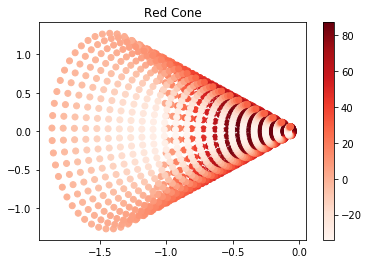

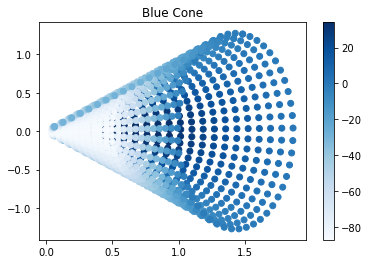

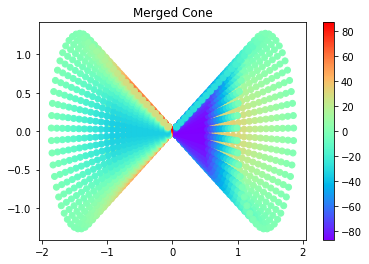

/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


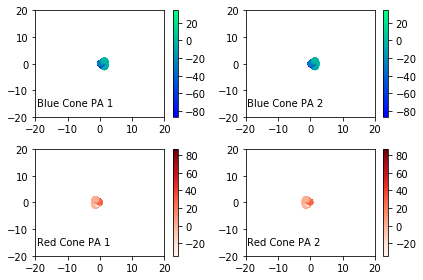

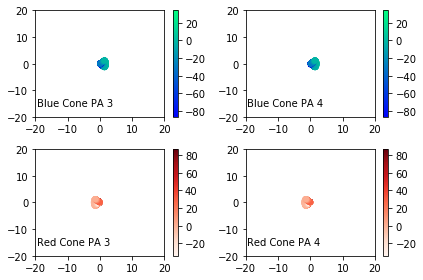

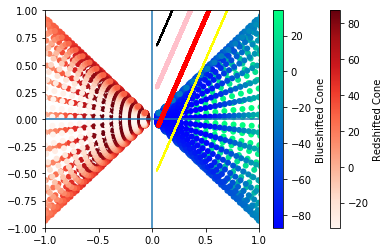

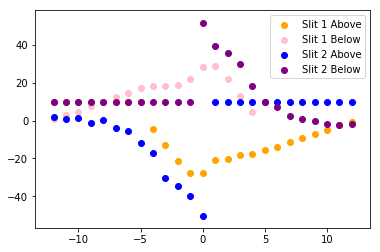

ingredients [-12 -- -11 -- -10 -- -9 -- -8 -- -7 -- -6 -- -5 -- -4 -3 -2 -1 0 1 2 3 4] [-- -- -- -- -- -- -- -- -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10 11 12]
xs data concat [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
xs fit concat [-12 -- -11 -- -10 -- -9 -- -8 -- -7 -- -6 -- -5 -- -4 -3 -2 -1 -- -- -- --
 -- -- -- -- -4 -3 -2 -1 0 1 2 3 4 5 6 7]

/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")



first, last -6 4.0 12 24
now cut [-6 -- -5 -- -4 -3 -2 -1 0 1 2 3]
~~~~~now model~~~~~
[-12 -- -11 -- -10 -- -9 -- -8 -- -7 -- -6 -- -5 -- -4 -3 -2 -1 -- -- -- --
 -- -- -- -- -4 -3 -2 -1 0 1 2 3 4 5 6 7]
[0.7142857142857143 -- 2.823529411764706 -- 4.5 -- 7.75 --
 9.709677419354838 -- 12.631578947368421 -- 14.704545454545455 --
 17.22222222222222 -- 17.964285714285715 18.359375 18.86111111111111
 21.861702127659573 -- -- -- -- -- -- -- -- -4.2272727272727275
 -12.906976744186046 -21.096774193548388 -27.5 -27.565 -20.6
 -20.44927536231884 -18.34426229508197 -17.636363636363637
 -15.26530612244898 -13.7 -11.305555555555555]
~~~~now data~~~~~
[-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
[-19.2278506687, 79.2429806179, 46.3106953876, 54.8797081961, 54.2503874193, 57.2739298784, 62.3947179303, 70.79121217, 43.0896800944, 82.1622911612, 42.9585290408, -678.647610887, -233.846657458, -230.532023831, -258.05972326, -242.703084466, -247.392013188, -266.4827888

IndexError: list index out of range

In [30]:
#bicone_construction_cocone(phi,theta,r_t, half_angle,half_angle_2, vel_max)
##y=bicone_construction_cocone(20, 0, 2, 20, 40, 100)
result=[20,90,1,40,40,100]
lnlike_cocone(result)
'''So bicone_construction basically builds your bicone for a fine resolution'''
'''What if there is a way to put in your cone for the exact spatial scale? (arcseconds as an input)'''

In [28]:

'''This code is the masked version of a cocone, but now were making an IFU map with spatial
direction in arcseconds

-->Id like to degrade the IFU image as soon as possible to the resolution/ pixelsize of the observatory
-->Make this code functional for MaNGA data
'''




def bicone_construction_cocone(phi,theta,r_t, half_angle,half_angle_2, vel_max):
    #MaNGA pixelsize is 2"/ pixel
    #Do we also need a conversion to kpc?
    
    half_angle_r=math.radians(half_angle)
    half_angle_r_2=math.radians(half_angle_2)
    #h=[2*x for x in r_t]
    h=2*r_t
##to get the radius of the cone, you need to do some trig
##tan half_angle_r=r/h

    r=math.tan(half_angle_r)*h
    r_2=math.tan(half_angle_r_2)*h
    
    theta_para=(np.asarray(np.linspace(0,2*np.pi,50)))
    '''you dont want u1 to go all the way to -h unless that PA is totally aligned (PA90)'''
  
    u1_orig=np.asarray(np.linspace(-h,0,30))+h#was 50
    u2_orig=-np.asarray(np.linspace(-h,0,30))-h
    u=-np.asarray(np.linspace(-h,0,30))

   
   
    
    phi_1=math.radians(phi)
    #this is the angle of rotation about x, so inclination
    theta_1=math.radians(theta)
    
    #this is the angle of rotation about y, we don't actually need to rotate about this guy
    psi_1=math.radians(0)
    #this is the angle of rotation about z, so PA
    #R is the rotation matrix
    R=np.matrix([[np.cos(theta_1)*np.cos(psi_1),np.cos(phi_1)*np.sin(psi_1)+np.sin(phi_1)*np.sin(theta_1)*np.cos(psi_1),
                  np.sin(phi_1)*np.sin(psi_1)-np.cos(phi_1)*np.sin(theta_1)*np.cos(psi_1)],
                     [-np.cos(theta_1)*np.sin(psi_1), 
                      np.cos(phi_1)*np.cos(psi_1)-np.sin(phi_1)*np.sin(theta_1)*np.sin(psi_1),
                      np.sin(phi_1)*np.cos(psi_1)+np.cos(phi_1)*np.sin(theta_1)*np.sin(psi_1)],
                     [np.sin(theta_1), -np.sin(phi_1)*np.cos(theta_1), np.cos(phi_1)*np.cos(theta_1)]])
    #x is going to be the front facing side (blueshifted) and x_2 is the rear cone
    x=[]
    x_2=[]
    y=[]
    y_2=[]
    z=[]
    z_2=[]
    z_plane=[]
    vel_radial_bottom=[]
    vel_radial_top=[]
    vel_top=[]
    vel_bottom=[]
    vel_totes=[]
    x_totes=[]
    y_totes=[]
    z_totes=[]
    x_plane=[]
    y_plane=[]
    z_plane=[]
    x_plane_2=[]
    y_plane_2=[]
    z_plane_2=[]
    for i in range(len(theta_para)):
        for j in range(len(u)):
            if i==0: 
                i=1
            if j==0:
                j=1
        
            #here's the parametric equation for a bicone
            X=((h-u[j])*r*np.cos((theta_para[i])))/h
            Y=((h-u[j])*r*np.sin((theta_para[i])))/h
            
            X_2=((h-u[j])*r_2*np.cos((theta_para[i])))/h
            Y_2=((h-u[j])*r_2*np.sin((theta_para[i])))/h
            
            #blue cone above is Z_1
            #red cone below is Z_2
            Z_1=u2_orig[j]#was u2
            Z_2=u1_orig[j]#was u1
            
            y_plane_into=0
            
            pos=np.matrix([X,Y,Z_1])
            pos_2=np.matrix([X_2,Y_2,Z_2])
            #pos_plane=np.matrix([X,y_plane_into,Z_1])
            #pos_plane_2=np.matrix([X,y_plane_into, Z_2])
            #this is taking and applying the rotation matrix
            new_pos=np.dot(R,pos.transpose())
            new_pos_2=np.dot(R,pos_2.transpose())
           
            
            
            #do that thing:
            #equation: d/dw/e((x^2 + y^2)/c^2 = (z-z_0)^2)
            #recall c=r/h
            #<2*x,2*y,-(2*r^2*z)/h^2>
            #plug in everything and normalize and then the z component is your v_rad
    
            
            slope_x=2*np.array(new_pos[0]).ravel()
            slope_y=2*np.array(new_pos[1]).ravel()
            slope_z=-(2*r**2*np.array(new_pos[2]).ravel())/h**2
            
            norm=np.sqrt(slope_x**2+slope_y**2+slope_z**2)
            '''applying velocity laws for a flat bicone'''
            if np.sqrt(np.array(new_pos[0]).ravel()**2+np.array(new_pos[1]).ravel()**2+np.array(new_pos[2]).ravel()**2)<r_t:
                #vel_max_top=-(vel_max/r_t)*np.sqrt(new_pos[0]**2+new_pos[1]**2+new_pos[2]**2)
                vel_max_top=-vel_max
            if np.sqrt(np.array(new_pos[0]).ravel()**2+np.array(new_pos[1]).ravel()**2+np.array(new_pos[2]).ravel()**2)>r_t:
                vel_max_top=-(vel_max-(vel_max/r_t)*(np.sqrt(np.array(new_pos[0]).ravel()**2+np.array(new_pos[1]).ravel()**2+np.array(new_pos[2]).ravel()**2)-r_t))
            if np.sqrt(np.array(new_pos[0]).ravel()**2+np.array(new_pos[1]).ravel()**2+np.array(new_pos[2]).ravel()**2)<2*r_t:
                
                x.append(np.array(new_pos[0]).ravel())
                y.append(np.array(new_pos[1]).ravel())
                z.append(np.array(new_pos[2]).ravel())
                A_comp=-(slope_y/norm)
                rad_proj=vel_max_top*np.array(A_comp).ravel()
                vel_radial_top.append(round(rad_proj[0]))
             
        
    
            slope_x=2*np.array(new_pos_2[0]).ravel()
            slope_y=2*np.array(new_pos_2[1]).ravel()
            
            slope_z_2=-(2*r_2**2*np.array(new_pos_2[2]).ravel())/h**2
            norm=np.sqrt(slope_x**2+slope_y**2+slope_z_2**2)
            
            if np.sqrt(np.array(new_pos_2[0]).ravel()**2+np.array(new_pos_2[1]).ravel()**2+np.array(new_pos_2[2]).ravel()**2)<r_t:
#                vel_max_bottom=-(vel_max/r_t)*np.sqrt(new_pos_2[0]**2+new_pos_2[1]**2+new_pos_2[2]**2)
                vel_max_bottom=-vel_max
            if np.sqrt(np.array(new_pos_2[0]).ravel()**2+np.array(new_pos_2[1]).ravel()**2+np.array(new_pos_2[2]).ravel()**2)>r_t:
                
                vel_max_bottom=-(vel_max-(vel_max/r_t)*(np.sqrt(np.array(new_pos[0]).ravel()**2+np.array(new_pos[1]).ravel()**2+np.array(new_pos[2]).ravel()**2)-r_t))
            if np.sqrt(np.array(new_pos_2[0]).ravel()**2+np.array(new_pos_2[1]).ravel()**2+np.array(new_pos_2[2]).ravel()**2)<2*r_t:
                
                x_2.append(np.array(new_pos_2[0]).ravel())
                y_2.append(np.array(new_pos_2[1]).ravel())
                z_2.append(np.array(new_pos_2[2]).ravel())
                #A dot x should give us the vector projection along x - divide by the magnitude of A to get cos (theta)
                A_comp=-(slope_y/norm)
                #vel_bottom.append(vel_max_bottom)
                rad_proj_2=np.array(A_comp).ravel()*vel_max_bottom
                vel_radial_bottom.append(round(rad_proj_2[0]))
         
    merged_x=x+x_2
    merged_y=y+y_2
    merged_z=z+z_2
    
    cone_red_x=x_2
    cone_red_y=y_2
    cone_red_z=z_2
    
    cone_blue_x=x
    cone_blue_y=y
    cone_blue_z=z
    
    merged_x_plane=x_plane+x_plane_2
    merged_y_plane=y_plane+y_plane_2
    merged_z_plane=z_plane+z_plane_2
    
    
    merged_vel=vel_radial_top+vel_radial_bottom
    
    cone_red_vel=vel_radial_bottom
    cone_blue_vel=vel_radial_top
    
    

    plt.scatter(cone_red_x, cone_red_z, c=cone_red_vel, cmap='Reds')
    plt.colorbar()
    plt.title('Red Cone')
    plt.show()
    
    
    plt.scatter(cone_blue_x, cone_blue_z, c=cone_blue_vel, cmap='Blues')
    plt.colorbar()
    plt.title('Blue Cone')
    plt.show()
    
    plt.scatter(merged_x, merged_z, c=merged_vel, cmap='rainbow')
    plt.colorbar()
    plt.title('Merged Cone')
    plt.show()
    
    
    return merged_x, merged_y, merged_z, merged_vel, merged_x_plane, merged_y_plane, merged_z_plane, cone_red_x, cone_red_y, cone_red_z, cone_blue_x, cone_blue_y, cone_blue_z, cone_red_vel, cone_blue_vel
                
    
    
    
                        
def lnlike_cocone(z):
    
    
    #bicone_construction(h,phi,theta,r_t, half_angle )
    phi_array, theta_array, thetados_array, r_t,half_angle, vel_max_array=z
    
    
    h=2*r_t
    #h=[2*x for x in r_t]
    
    out=bicone_construction_cocone(phi_array, theta_array,thetados_array, r_t, half_angle, vel_max_array)
    
    merged_x=[float(y) for y in out[0]]
    merged_y=[float(y) for y in out[1]]
    merged_z=[float(y) for y in out[2]]
    merged_vel=[float(y) for y in out[3]]
    merged_x_plane=[float(y) for y in out[4]]
    merged_y_plane=[float(y) for y in out[5]]
    merged_z_plane=[float(y) for y in out[6]]
    
    cone_red_x=[float(y) for y in out[7]]
    cone_red_y=[float(y) for y in out[8]]
    cone_red_z=[float(y) for y in out[9]]
    cone_blue_x=[float(y) for y in out[10]]
    cone_blue_y=[float(y) for y in out[11]]
    cone_blue_z=[float(y) for y in out[12]]
    
    cone_red_vel=[float(y) for y in out[13]]
    cone_blue_vel=[float(y) for y in out[14]]
    ##vel_radial_top actually refers to the stuff going away from us on the bottom -ugh
    #it's the projection looking down in z
    #p=ax.scatter(x_2,y_2,z_2, c=vel_radial_bottom)
    
    
    #%```````````````````````````````````
    #I'm going to make the phi cuts according to observe PAs
    PA_obs_1=np.radians(PA1+90)
    PA_obs_2=np.radians(PA2+90)
    PA_obs_3=np.radians(PA3+90)
    PA_obs_4=np.radians(PA4+90)
 
    x_slit_blue=np.linspace(-100*h,100*h, len(cone_blue_z))
    x_slit_red=np.linspace(-100*h,100*h,len(cone_red_z))
    
    len_pts=max(upper_lim-lower_lim,upper_lim_ortho-lower_lim_ortho)
    
    #height is based upon the length of the overall data we have on the bicone and the slitwidth
    height=slitwidth/pixelscale_1#(slitwidth/(pixelscale*len_pts))#*(h)#I kinda want this to be a fraction of something else#10#was 4
    
    z_slit_1_upper_red=[x*np.tan(PA_obs_1)-height/np.cos(PA_obs_1) for x in cone_red_x]
    z_slit_1_lower_red=[x*np.tan(PA_obs_1)+height/np.cos(PA_obs_1) for x in cone_red_x]
    z_slit_1_upper_blue=[x*np.tan(PA_obs_1)-height/np.cos(PA_obs_1) for x in cone_blue_x]
    z_slit_1_lower_blue=[x*np.tan(PA_obs_1)+height/np.cos(PA_obs_1) for x in cone_blue_x]
    
    height=slitwidth/pixelscale_2
    
    z_slit_2_upper_red=[x*np.tan(PA_obs_2)-height/np.cos(PA_obs_2) for x in cone_red_x]
    z_slit_2_lower_red=[x*np.tan(PA_obs_2)+height/np.cos(PA_obs_2) for x in cone_red_x]
    z_slit_2_upper_blue=[x*np.tan(PA_obs_2)-height/np.cos(PA_obs_2) for x in cone_blue_x]
    z_slit_2_lower_blue=[x*np.tan(PA_obs_2)+height/np.cos(PA_obs_2) for x in cone_blue_x]
    
    height=slitwidth/pixelscale_3
    
    #so since 66 < 90:
    z_slit_3_upper_red=[x*np.tan(PA_obs_3)-height/np.cos(PA_obs_3) for x in cone_red_x]
    z_slit_3_lower_red=[x*np.tan(PA_obs_3)+height/np.cos(PA_obs_3) for x in cone_red_x]
    z_slit_3_upper_blue=[x*np.tan(PA_obs_3)-height/np.cos(PA_obs_3) for x in cone_blue_x]
    z_slit_3_lower_blue=[x*np.tan(PA_obs_3)+height/np.cos(PA_obs_3) for x in cone_blue_x]
    
    height=slitwidth/pixelscale_4
    
    #so since 156 > 90:
    z_slit_4_upper_red=[x*np.tan(PA_obs_4)-height/np.cos(PA_obs_4) for x in cone_red_x]
    z_slit_4_lower_red=[x*np.tan(PA_obs_4)+height/np.cos(PA_obs_4) for x in cone_red_x]
    z_slit_4_upper_blue=[x*np.tan(PA_obs_4)-height/np.cos(PA_obs_4) for x in cone_blue_x]
    z_slit_4_lower_blue=[x*np.tan(PA_obs_4)+height/np.cos(PA_obs_4) for x in cone_blue_x]

    '''if PA1 < 90:
        z_slit_1_upper_red=[x*np.tan(PA_obs_1)-height/np.cos(PA_obs_1) for x in cone_red_x]
        z_slit_1_lower_red=[x*np.tan(PA_obs_1)+height/np.cos(PA_obs_1) for x in cone_red_x]
        z_slit_1_upper_blue=[x*np.tan(PA_obs_1)-height/np.cos(PA_obs_1) for x in cone_blue_x]
        z_slit_1_lower_blue=[x*np.tan(PA_obs_1)+height/np.cos(PA_obs_1) for x in cone_blue_x]
    else:
        z_slit_1_upper_red=[x*np.tan(PA_obs_1)+height/np.cos(PA_obs_1) for x in cone_red_x]
        z_slit_1_lower_red=[x*np.tan(PA_obs_1)-height/np.cos(PA_obs_1) for x in cone_red_x]
        z_slit_1_upper_blue=[x*np.tan(PA_obs_1)+height/np.cos(PA_obs_1) for x in cone_blue_x]
        z_slit_1_lower_blue=[x*np.tan(PA_obs_1)-height/np.cos(PA_obs_1) for x in cone_blue_x]
        
    if PA2 > 90:
        z_slit_2_upper_red=[x*np.tan(PA_obs_2)-height/np.cos(PA_obs_2) for x in cone_red_x]
        z_slit_2_lower_red=[x*np.tan(PA_obs_2)+height/np.cos(PA_obs_2) for x in cone_red_x]
        z_slit_2_upper_blue=[x*np.tan(PA_obs_2)-height/np.cos(PA_obs_2) for x in cone_blue_x]
        z_slit_2_lower_blue=[x*np.tan(PA_obs_2)+height/np.cos(PA_obs_2) for x in cone_blue_x]
    else: 
        z_slit_2_upper_red=[x*np.tan(PA_obs_2)-height/np.cos(PA_obs_2) for x in cone_red_x]
        z_slit_2_lower_red=[x*np.tan(PA_obs_2)+height/np.cos(PA_obs_2) for x in cone_red_x]
        z_slit_2_upper_blue=[x*np.tan(PA_obs_2)-height/np.cos(PA_obs_2) for x in cone_blue_x]
        z_slit_2_lower_blue=[x*np.tan(PA_obs_2)+height/np.cos(PA_obs_2) for x in cone_blue_x]'''
    
    
    
    inds_1=np.logical_and((np.asarray(cone_blue_z) > np.asarray(z_slit_1_lower_blue)), (np.asarray(cone_blue_z) < np.asarray(z_slit_1_upper_blue)))
    inds_1_below=np.logical_and((np.asarray(cone_red_z) > np.asarray(z_slit_1_lower_red)), (np.asarray(cone_red_z) < np.asarray(z_slit_1_upper_red)))
    
    inds_2=np.logical_and((np.asarray(cone_blue_z) > np.asarray(z_slit_2_lower_blue)), (np.asarray(cone_blue_z) < np.asarray(z_slit_2_upper_blue)))
    inds_2_below=np.logical_and((np.asarray(cone_red_z) > np.asarray(z_slit_2_lower_red)), (np.asarray(cone_red_z) < np.asarray(z_slit_2_upper_red)))
    
    inds_3=np.logical_and((np.asarray(cone_blue_z) > np.asarray(z_slit_3_lower_blue)), (np.asarray(cone_blue_z) < np.asarray(z_slit_3_upper_blue)))
    inds_3_below=np.logical_and((np.asarray(cone_red_z) > np.asarray(z_slit_3_lower_red)), (np.asarray(cone_red_z) < np.asarray(z_slit_3_upper_red)))
    
    inds_4=np.logical_and((np.asarray(cone_blue_z) > np.asarray(z_slit_4_lower_blue)), (np.asarray(cone_blue_z) < np.asarray(z_slit_4_upper_blue)))
    inds_4_below=np.logical_and((np.asarray(cone_red_z) > np.asarray(z_slit_4_lower_red)), (np.asarray(cone_red_z) < np.asarray(z_slit_4_upper_red)))
    

    '''xs_cont_1 is the blueshifted cone of PA1'''
    xs_cont_1=np.asarray(cone_blue_x)[np.asarray(inds_1)]
    ys_cont_1=np.asarray(cone_blue_y)[np.asarray(inds_1)]
    zs_cont_1=np.asarray(cone_blue_z)[np.asarray(inds_1)]
    vel_cont_1=np.asarray(cone_blue_vel)[np.asarray(inds_1)]
    
    '''xs_cont_1_below is the redshifted cone of PA1'''
    xs_cont_1_below=np.asarray(cone_red_x)[np.asarray(inds_1_below)]
    ys_cont_1_below=np.asarray(cone_red_y)[np.asarray(inds_1_below)]
    zs_cont_1_below=np.asarray(cone_red_z)[np.asarray(inds_1_below)]
    vel_cont_1_below=np.asarray(cone_red_vel)[np.asarray(inds_1_below)]
    
    xs_cont_2=np.asarray(cone_blue_x)[np.asarray(inds_2)]
    ys_cont_2=np.asarray(cone_blue_y)[np.asarray(inds_2)]
    zs_cont_2=np.asarray(cone_blue_z)[np.asarray(inds_2)]
    vel_cont_2=np.asarray(cone_blue_vel)[np.asarray(inds_2)]
    
    xs_cont_2_below=np.asarray(cone_red_x)[np.asarray(inds_2_below)]
    ys_cont_2_below=np.asarray(cone_red_y)[np.asarray(inds_2_below)]
    zs_cont_2_below=np.asarray(cone_red_z)[np.asarray(inds_2_below)]
    vel_cont_2_below=np.asarray(cone_red_vel)[np.asarray(inds_2_below)]
    
    xs_cont_3=np.asarray(cone_blue_x)[np.asarray(inds_3)]
    ys_cont_3=np.asarray(cone_blue_y)[np.asarray(inds_3)]
    zs_cont_3=np.asarray(cone_blue_z)[np.asarray(inds_3)]
    vel_cont_3=np.asarray(cone_blue_vel)[np.asarray(inds_3)]
    
    xs_cont_3_below=np.asarray(cone_red_x)[np.asarray(inds_3_below)]
    ys_cont_3_below=np.asarray(cone_red_y)[np.asarray(inds_3_below)]
    zs_cont_3_below=np.asarray(cone_red_z)[np.asarray(inds_3_below)]
    vel_cont_3_below=np.asarray(cone_red_vel)[np.asarray(inds_3_below)]
    
    xs_cont_4=np.asarray(cone_blue_x)[np.asarray(inds_4)]
    ys_cont_4=np.asarray(cone_blue_y)[np.asarray(inds_4)]
    zs_cont_4=np.asarray(cone_blue_z)[np.asarray(inds_4)]
    vel_cont_4=np.asarray(cone_blue_vel)[np.asarray(inds_4)]
    
    xs_cont_4_below=np.asarray(cone_red_x)[np.asarray(inds_4_below)]
    ys_cont_4_below=np.asarray(cone_red_y)[np.asarray(inds_4_below)]
    zs_cont_4_below=np.asarray(cone_red_z)[np.asarray(inds_4_below)]
    vel_cont_4_below=np.asarray(cone_red_vel)[np.asarray(inds_4_below)]
    
    
    fig=plt.figure()
    ax=fig.add_subplot(221)
    ax.annotate('Blue Cone PA 1', xy=(0.01,0.1),xycoords='axes fraction')
    p=ax.scatter(xs_cont_1, zs_cont_1, c=vel_cont_1, edgecolors='none', cmap=cm.winter)
    ax.set_xlim([-h/4,h/4])
    ax.set_ylim([-h/4,h/4])
    #p1=ax.scatter(xs_cont_2, zs_cont_2, c=vel_cont_2, edgecolors='none', cmap=cm.rainbow)
    cbaa0=fig.colorbar(p)
    #cbbb=fig.colorbar(p1)
    
    ax1=fig.add_subplot(222)
    ax1.annotate('Blue Cone PA 2', xy=(0.01,0.1),xycoords='axes fraction')
    #p=ax.scatter(xs_cont_1, zs_cont_1, c=vel_cont_1, edgecolors='none', cmap=cm.rainbow)
    p1=ax1.scatter(xs_cont_2, zs_cont_2, c=vel_cont_2, edgecolors='none', cmap=cm.winter)
    cbaa1=fig.colorbar(p1)
    #cbbb=fig.colorbar(p1, shrink=0.25)
    ax1.set_xlim([-h/4,h/4])
    ax1.set_ylim([-h/4,h/4])
    
    ax2=fig.add_subplot(223)
    ax2.annotate('Red Cone PA 1', xy=(0.01,0.1),xycoords='axes fraction')
    #p=ax.scatter(xs_cont_1, zs_cont_1, c=vel_cont_1, edgecolors='none', cmap=cm.rainbow)
    p2=ax2.scatter(xs_cont_1_below, zs_cont_1_below, c=vel_cont_1_below, edgecolors='none', cmap=cm.Reds)
    cbaa2=fig.colorbar(p2)
    #cbbb=fig.colorbar(p1, shrink=0.25)
    ax2.set_xlim([-h/4,h/4])
    ax2.set_ylim([-h/4,h/4])
    
    ax3=fig.add_subplot(224)
    ax3.annotate('Red Cone PA 2', xy=(0.01,0.1),xycoords='axes fraction')
    #p=ax.scatter(xs_cont_1, zs_cont_1, c=vel_cont_1, edgecolors='none', cmap=cm.rainbow)
    p3=ax3.scatter(xs_cont_2_below, zs_cont_2_below, c=vel_cont_2_below, edgecolors='none', cmap=cm.Reds)
    cbaa3=fig.colorbar(p3)
    #cbbb=fig.colorbar(p1, shrink=0.25)
    ax3.set_xlim([-h/4,h/4])
    ax3.set_ylim([-h/4,h/4])
    
    
    
    fig.tight_layout()
    savefig('../cocone_2_J0930_PAs12.pdf')
    
    
    fig=plt.figure()
    ax=fig.add_subplot(221)
    ax.annotate('Blue Cone PA 3', xy=(0.01,0.1),xycoords='axes fraction')
    p=ax.scatter(xs_cont_3, zs_cont_3, c=vel_cont_3, edgecolors='none', cmap=cm.winter)
    ax.set_xlim([-h/4,h/4])
    ax.set_ylim([-h/4,h/4])
    #p1=ax.scatter(xs_cont_2, zs_cont_2, c=vel_cont_2, edgecolors='none', cmap=cm.rainbow)
    cbaa0=fig.colorbar(p)
    #cbbb=fig.colorbar(p1)
    
    ax1=fig.add_subplot(222)
    ax1.annotate('Blue Cone PA 4', xy=(0.01,0.1),xycoords='axes fraction')
    #p=ax.scatter(xs_cont_1, zs_cont_1, c=vel_cont_1, edgecolors='none', cmap=cm.rainbow)
    p1=ax1.scatter(xs_cont_4, zs_cont_4, c=vel_cont_4, edgecolors='none', cmap=cm.winter)
    cbaa1=fig.colorbar(p1)
    #cbbb=fig.colorbar(p1, shrink=0.25)
    ax1.set_xlim([-h/4,h/4])
    ax1.set_ylim([-h/4,h/4])
    
    ax2=fig.add_subplot(223)
    ax2.annotate('Red Cone PA 3', xy=(0.01,0.1),xycoords='axes fraction')
    #p=ax.scatter(xs_cont_1, zs_cont_1, c=vel_cont_1, edgecolors='none', cmap=cm.rainbow)
    p2=ax2.scatter(xs_cont_3_below, zs_cont_3_below, c=vel_cont_3_below, edgecolors='none', cmap=cm.Reds)
    cbaa2=fig.colorbar(p2)
    #cbbb=fig.colorbar(p1, shrink=0.25)
    ax2.set_xlim([-h/4,h/4])
    ax2.set_ylim([-h/4,h/4])
    
    ax3=fig.add_subplot(224)
    ax3.annotate('Red Cone PA 4', xy=(0.01,0.1),xycoords='axes fraction')
    #p=ax.scatter(xs_cont_1, zs_cont_1, c=vel_cont_1, edgecolors='none', cmap=cm.rainbow)
    p3=ax3.scatter(xs_cont_4_below, zs_cont_4_below, c=vel_cont_4_below, edgecolors='none', cmap=cm.Reds)
    cbaa3=fig.colorbar(p3)
    #cbbb=fig.colorbar(p1, shrink=0.25)
    ax3.set_xlim([-h/4,h/4])
    ax3.set_ylim([-h/4,h/4])
    
    
    
    fig.tight_layout()
    savefig('../cocone_2_J0930_PAs34.pdf')
    
    
    fig=plt.figure()
    
    ax1 = fig.add_subplot(111)
    #p=ax.scatter(merged_x,merged_z,c=merged_vel,edgecolors='none')
    
    p=ax1.scatter(cone_red_x, cone_red_z, c=cone_red_vel, edgecolors='none',cmap=cm.Reds)
    cba=fig.colorbar(p)
    p1=ax1.scatter(cone_blue_x, cone_blue_z, c=cone_blue_vel, edgecolors='none', cmap=cm.winter)
    cbb=fig.colorbar(p1)
    #plt.xlim([-h/4,h/4])
    #plt.ylim([-h/4,h/4])
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.axhline(y=0)
    plt.axvline(x=0)
    #p1=ax.plot(merged_x,z_slit_1, c='R')
    #p2=ax.plot(merged_x, z_slit_2, c='G')
    #p3=ax.plot(merged_x,z_slit_2_upper)
    #p4=ax.plot(merged_x,z_slit_2_lower)
    #p5=ax.plot(merged_x,z_slit_1_upper)
    #p6=ax.plot(merged_x,z_slit_1_lower)
    
    cba.set_label('Redshifted Cone')
    cbb.set_label('Blueshifted Cone')
    
    
    
    '''Now its time to slice things up'''
    
    r_slit_1_above=[]
    v_slit_1_above=[]
    r_slit_2_above=[]
    v_slit_2_above=[]
    r_slit_1_below=[]
    v_slit_1_below=[]
    r_slit_2_below=[]
    v_slit_2_below=[]
    
    mask_slit_1_above=[]
    mask_slit_2_above=[]
    mask_slit_1_below=[]
    mask_slit_2_below=[]
    
    
    r_slit_3_above=[]
    v_slit_3_above=[]
    r_slit_4_above=[]
    v_slit_4_above=[]
    r_slit_3_below=[]
    v_slit_3_below=[]
    r_slit_4_below=[]
    v_slit_4_below=[]
    
    mask_slit_3_above=[]
    mask_slit_4_above=[]
    mask_slit_3_below=[]
    mask_slit_4_below=[]
    
    
    '''stepping needs to be pixelscale'''
    '''slitwidth is height'''
    '''so if were already stepping by the spatial direction just make all of these rows your data points'''
  
    stepping=1
  
    
    length=int(max(abs(20-upper_lim),abs(20-lower_lim),abs(20-upper_lim_ortho),abs(20-lower_lim_ortho),abs(20-lower_lim_66),abs(20-upper_lim_66),abs(20-lower_lim_ortho),abs(20-lower_lim_156),abs(20-upper_lim_156)))
    length=max((upper_lim-lower_lim),(upper_lim_ortho-lower_lim_ortho),(upper_lim_66-lower_lim_66),(upper_lim_156-lower_lim_156))
    
    for j in range(length):
        #
        width=pixelscale_1*j
        '''z_1_perp_upper=[-x*(1/np.tan(PA_obs_1))-(width+stepping+0.5)/np.sin(math.radians(PA1-90)) for x in xs_cont_1]
        z_1_perp_lower=[-x*(1/np.tan(PA_obs_1))-(width+0.5)/np.sin(math.radians(PA1-90)) for x in xs_cont_1]
        z_1_perpl_upper=[-x*(1/np.tan(PA_obs_1))+(width+0.5)/np.sin(math.radians(PA1-90)) for x in xs_cont_1]
        z_1_perpl_lower=[-x*(1/np.tan(PA_obs_1))+(width+stepping+0.5)/np.sin(math.radians(PA1-90)) for x in xs_cont_1]
        '''
        z_1_perp_upper=[-x*(1/np.tan(PA_obs_1))+(width+1.5*pixelscale_1)*np.sin(PA_obs_1+np.pi/2) for x in xs_cont_1]
        z_1_perp_lower=[-x*(1/np.tan(PA_obs_1))+(width+0.5*pixelscale_1)*np.sin(PA_obs_1+np.pi/2) for x in xs_cont_1]
        z_1_perpl_upper=[-x*(1/np.tan(PA_obs_1))-(width+0.5*pixelscale_1)*np.sin(PA_obs_1+np.pi/2) for x in xs_cont_1]
        z_1_perpl_lower=[-x*(1/np.tan(PA_obs_1))-(width+1.5*pixelscale_1)*np.sin(PA_obs_1+np.pi/2) for x in xs_cont_1]
        
        
        
        pos_1=np.logical_and((np.asarray(zs_cont_1) > np.asarray(z_1_perp_upper)), (np.asarray(zs_cont_1) < np.asarray(z_1_perp_lower)))
        pos_1_1=np.logical_and((np.asarray(zs_cont_1) > np.asarray(z_1_perpl_upper)), (np.asarray(zs_cont_1) < np.asarray(z_1_perpl_lower)))
        pos_1_center=np.logical_and((np.asarray(zs_cont_1) < np.asarray(z_1_perpl_upper)), (np.asarray(zs_cont_1) > np.asarray(z_1_perp_lower)))
        #plt.plot(xs_cont_1, z_1_perp_lower, color='black')#, label='z_1_perp_lower',lw=4,ls='--', color='red')
        #plt.plot(xs_cont_1, z_1_perpl_upper, color='black') #label='z_1_perpl_upper',lw=4, color='pink')
        #if j==0:
            #plt.plot(xs_cont_2, z_2_perp_upper, label='z_1_perp_upper',lw=4, color='black')
            #plt.plot(xs_cont_1, z_1_perp_lower, label='z_1_perp_lower',lw=4,ls='--', color='red')
            #plt.plot(xs_cont_1, z_1_perpl_upper, label='z_1_perpl_upper',lw=4, color='pink')
            #plt.plot(xs_cont_2, z_2_perpl_lower, label='z_1_perpl_lower',lw=4,ls='--', color='pink')
        
            
        
        if j==0:
            xs_cont_slit_middle=np.asarray(xs_cont_1)[np.asarray(pos_1_center)]
            zs_cont_slit_middle=np.asarray(zs_cont_1)[np.asarray(pos_1_center)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit_middle)**2+np.mean(zs_cont_slit_middle)**2))==True:
                r_slit_1_above.append(j)
                v_slit_1_above.append(10)
                mask_slit_1_above.append(1)
                
            else:
                #so this is the positions to the North so we'll make them negative
                r_slit_1_above.append(j)
                v_slit_1_above.append(np.mean(np.asarray(vel_cont_1)[np.asarray(pos_1_center)]))
                mask_slit_1_above.append(0)
        else:
            xs_cont_slit=np.asarray(xs_cont_1)[np.asarray(pos_1)]
            zs_cont_slit=np.asarray(zs_cont_1)[np.asarray(pos_1)]
            
            
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                
                r_slit_1_above.append(j)
                v_slit_1_above.append(10)
                mask_slit_1_above.append(1)
            else:
                #so this is the positions to the North so we'll make them negative
                r_slit_1_above.append(j)
                v_slit_1_above.append(np.mean(np.asarray(vel_cont_1)[np.asarray(pos_1)]))
                mask_slit_1_above.append(0)
                #r_slit_1_above.append(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))
                #v_slit_1_above.append(np.mean(np.asarray(vel_cont_1)[np.asarray(pos_1)]))
            
            
            xs_cont_slit=np.asarray(xs_cont_1)[np.asarray(pos_1_1)]
            zs_cont_slit=np.asarray(zs_cont_1)[np.asarray(pos_1_1)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                
                r_slit_1_above.append(-j)
                v_slit_1_above.append(10)
                mask_slit_1_above.append(1)
            else:
                r_slit_1_above.append(-j)
                #r_slit_1_above.append(-np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))
                v_slit_1_above.append(np.mean(np.asarray(vel_cont_1)[np.asarray(pos_1_1)]))
                mask_slit_1_above.append(0)
         
        z_1_perp_upper=[-x*(1/np.tan(PA_obs_1))+(width+1.5*pixelscale_1)*np.sin(PA_obs_1+np.pi/2) for x in xs_cont_1_below]
        z_1_perp_lower=[-x*(1/np.tan(PA_obs_1))+(width+0.5*pixelscale_1)*np.sin(PA_obs_1+np.pi/2) for x in xs_cont_1_below]
        z_1_perpl_upper=[-x*(1/np.tan(PA_obs_1))-(width+0.5*pixelscale_1)*np.sin(PA_obs_1+np.pi/2) for x in xs_cont_1_below]
        z_1_perpl_lower=[-x*(1/np.tan(PA_obs_1))-(width+1.5*pixelscale_1)*np.sin(PA_obs_1+np.pi/2) for x in xs_cont_1_below]
        
        pos_1_below=np.logical_and((np.asarray(zs_cont_1_below) > np.asarray(z_1_perp_upper)), (np.asarray(zs_cont_1_below) < np.asarray(z_1_perp_lower)))
        pos_1_below_1=np.logical_and((np.asarray(zs_cont_1_below) > np.asarray(z_1_perpl_upper)), (np.asarray(zs_cont_1_below) < np.asarray(z_1_perpl_lower)))
        pos_1_below_center=np.logical_and((np.asarray(zs_cont_1_below) < np.asarray(z_1_perpl_upper)), (np.asarray(zs_cont_1_below) > np.asarray(z_1_perp_lower)))
     
        if j==0:
            xs_cont_slit_middle=np.asarray(xs_cont_1_below)[np.asarray(pos_1_below_center)]
            zs_cont_slit_middle=np.asarray(zs_cont_1_below)[np.asarray(pos_1_below_center)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit_middle)**2+np.mean(zs_cont_slit_middle)**2))==True:
                r_slit_1_below.append(j)
                v_slit_1_below.append(10)
                mask_slit_1_below.append(1)
                
            else:
                #so this is the positions to the North so we'll make them negative
                r_slit_1_below.append(j)
                v_slit_1_below.append(np.mean(np.asarray(vel_cont_1_below)[np.asarray(pos_1_below_center)]))
                mask_slit_1_below.append(0)
        else:
        
            xs_cont_slit=np.asarray(xs_cont_1_below)[np.asarray(pos_1_below)]
            zs_cont_slit=np.asarray(zs_cont_1_below)[np.asarray(pos_1_below)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                r_slit_1_below.append(-j)
                v_slit_1_below.append(10)
                mask_slit_1_below.append(1)
                
            else:
                r_slit_1_below.append(j)
                v_slit_1_below.append(np.mean(np.asarray(vel_cont_1_below)[np.asarray(pos_1_below)]))
                mask_slit_1_below.append(0)
            
            xs_cont_slit=np.asarray(xs_cont_1_below)[np.asarray(pos_1_below_1)]
            zs_cont_slit=np.asarray(zs_cont_1_below)[np.asarray(pos_1_below_1)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2)):
                r_slit_1_below.append(-j)
                v_slit_1_below.append(10)
                mask_slit_1_below.append(1)
                
            else:
                r_slit_1_below.append(-j)
                v_slit_1_below.append(np.mean(np.asarray(vel_cont_1_below)[np.asarray(pos_1_below_1)]))
                mask_slit_1_below.append(0)
        
        '''now PA 66'''
        width=pixelscale_3*j
        '''z_1_perp_upper=[-x*(1/np.tan(PA_obs_1))-(width+stepping+0.5)/np.sin(math.radians(PA1-90)) for x in xs_cont_1]
        z_1_perp_lower=[-x*(1/np.tan(PA_obs_1))-(width+0.5)/np.sin(math.radians(PA1-90)) for x in xs_cont_1]
        z_1_perpl_upper=[-x*(1/np.tan(PA_obs_1))+(width+0.5)/np.sin(math.radians(PA1-90)) for x in xs_cont_1]
        z_1_perpl_lower=[-x*(1/np.tan(PA_obs_1))+(width+stepping+0.5)/np.sin(math.radians(PA1-90)) for x in xs_cont_1]
        '''
        z_3_perp_upper=[-x*(1/np.tan(PA_obs_3))+(width+1.5*pixelscale_3)*np.sin(PA_obs_3+np.pi/2) for x in xs_cont_3]
        z_3_perp_lower=[-x*(1/np.tan(PA_obs_3))+(width+pixelscale_3/2)*np.sin(PA_obs_3+np.pi/2) for x in xs_cont_3]
        z_3_perpl_upper=[-x*(1/np.tan(PA_obs_3))-(width+pixelscale_3/2)*np.sin(PA_obs_3+np.pi/2) for x in xs_cont_3]
        z_3_perpl_lower=[-x*(1/np.tan(PA_obs_3))-(width+1.5*pixelscale_3)*np.sin(PA_obs_3+np.pi/2) for x in xs_cont_3]
        
        #z_3_perp_upper=[-x*(1/np.tan(PA_obs_3))-(width+pixelscale_3)/np.sin(math.radians(PA3-90)) for x in xs_cont_3_below]
        #z_3_perp_lower=[-x*(1/np.tan(PA_obs_3))-(width+pixelscale_3/2)/np.sin(math.radians(PA3-90)) for x in xs_cont_3_below]
        #z_3_perpl_upper=[-x*(1/np.tan(PA_obs_3))+(width+pixelscale_3/2)/np.sin(math.radians(PA3-90)) for x in xs_cont_3_below]
        #z_3_perpl_lower=[-x*(1/np.tan(PA_obs_3))+(width+pixelscale_3)/np.sin(math.radians(PA3-90)) for x in xs_cont_3_below]
        
        
        pos_3=np.logical_and((np.asarray(zs_cont_3) > np.asarray(z_3_perp_upper)), (np.asarray(zs_cont_3) < np.asarray(z_3_perp_lower)))
        pos_3_1=np.logical_and((np.asarray(zs_cont_3) > np.asarray(z_3_perpl_upper)), (np.asarray(zs_cont_3) < np.asarray(z_3_perpl_lower)))
        pos_3_center=np.logical_and((np.asarray(zs_cont_3) < np.asarray(z_3_perpl_upper)), (np.asarray(zs_cont_3) > np.asarray(z_3_perp_lower)))
        if j==1:
            plt.plot(xs_cont_3, z_3_perp_lower, color='yellow')#, label='z_1_perp_lower',lw=4,ls='--', color='red')
            plt.plot(xs_cont_3, z_3_perpl_upper, color='black') #label='z_1_perpl_upper',lw=4, color='pink')
        if j==0:
            #plt.plot(xs_cont_2, z_2_perp_upper, label='z_1_perp_upper',lw=4, color='black')
            plt.plot(xs_cont_3, z_3_perp_lower, label='z_1_perp_lower',lw=4,ls='--', color='red')
            plt.plot(xs_cont_3, z_3_perpl_upper, label='z_1_perpl_upper',lw=4, color='pink')
            #plt.plot(xs_cont_2, z_2_perpl_lower, label='z_1_perpl_lower',lw=4,ls='--', color='pink')
        
            
        
        if j==0:
            xs_cont_slit_middle=np.asarray(xs_cont_3)[np.asarray(pos_3_center)]
            zs_cont_slit_middle=np.asarray(zs_cont_3)[np.asarray(pos_3_center)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit_middle)**2+np.mean(zs_cont_slit_middle)**2))==True:
                r_slit_3_above.append(j)
                v_slit_3_above.append(10)
                mask_slit_3_above.append(1)
                
            else:
                #so this is the positions to the North so we'll make them negative
                r_slit_3_above.append(j)
                v_slit_3_above.append(np.mean(np.asarray(vel_cont_3)[np.asarray(pos_3_center)]))
                mask_slit_3_above.append(0)
        else:
            xs_cont_slit=np.asarray(xs_cont_3)[np.asarray(pos_3)]
            zs_cont_slit=np.asarray(zs_cont_3)[np.asarray(pos_3)]
            
            
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                
                r_slit_3_above.append(j)
                v_slit_3_above.append(10)
                mask_slit_3_above.append(1)
            else:
                #so this is the positions to the North so we'll make them negative
                r_slit_3_above.append(j)
                v_slit_3_above.append(np.mean(np.asarray(vel_cont_3)[np.asarray(pos_3)]))
                mask_slit_3_above.append(0)
                #r_slit_1_above.append(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))
                #v_slit_1_above.append(np.mean(np.asarray(vel_cont_1)[np.asarray(pos_1)]))
            
            
            xs_cont_slit=np.asarray(xs_cont_3)[np.asarray(pos_3_1)]
            zs_cont_slit=np.asarray(zs_cont_3)[np.asarray(pos_3_1)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                
                r_slit_3_above.append(-j)
                v_slit_3_above.append(10)
                mask_slit_3_above.append(1)
            else:
                r_slit_3_above.append(-j)
                #r_slit_1_above.append(-np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))
                v_slit_3_above.append(np.mean(np.asarray(vel_cont_3)[np.asarray(pos_3_1)]))
                mask_slit_3_above.append(0)
         
        z_3_perp_upper=[-x*(1/np.tan(PA_obs_3))+(width+1.5*pixelscale_3)*np.sin(PA_obs_3+np.pi/2) for x in xs_cont_3_below]
        z_3_perp_lower=[-x*(1/np.tan(PA_obs_3))+(width+0.5*pixelscale_3)*np.sin(PA_obs_3+np.pi/2) for x in xs_cont_3_below]
        z_3_perpl_upper=[-x*(1/np.tan(PA_obs_3))-(width+0.5*pixelscale_3)*np.sin(PA_obs_3+np.pi/2) for x in xs_cont_3_below]
        z_3_perpl_lower=[-x*(1/np.tan(PA_obs_3))-(width+1.5*pixelscale_3)*np.sin(PA_obs_3+np.pi/2) for x in xs_cont_3_below]
        
        pos_3_below=np.logical_and((np.asarray(zs_cont_3_below) > np.asarray(z_3_perp_upper)), (np.asarray(zs_cont_3_below) < np.asarray(z_3_perp_lower)))
        pos_3_below_1=np.logical_and((np.asarray(zs_cont_3_below) > np.asarray(z_3_perpl_upper)), (np.asarray(zs_cont_3_below) < np.asarray(z_3_perpl_lower)))
        pos_3_below_center=np.logical_and((np.asarray(zs_cont_3_below) < np.asarray(z_3_perpl_upper)), (np.asarray(zs_cont_3_below) > np.asarray(z_3_perp_lower)))
     
        if j==0:
            xs_cont_slit_middle=np.asarray(xs_cont_3_below)[np.asarray(pos_3_below_center)]
            zs_cont_slit_middle=np.asarray(zs_cont_3_below)[np.asarray(pos_3_below_center)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit_middle)**2+np.mean(zs_cont_slit_middle)**2))==True:
                r_slit_3_below.append(j)
                v_slit_3_below.append(10)
                mask_slit_3_below.append(1)
                
            else:
                #so this is the positions to the North so we'll make them negative
                r_slit_3_below.append(j)
                v_slit_3_below.append(np.mean(np.asarray(vel_cont_3_below)[np.asarray(pos_3_below_center)]))
                mask_slit_3_below.append(0)
        else:
        
            xs_cont_slit=np.asarray(xs_cont_3_below)[np.asarray(pos_3_below)]
            zs_cont_slit=np.asarray(zs_cont_3_below)[np.asarray(pos_3_below)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                r_slit_3_below.append(-j)
                v_slit_3_below.append(10)
                mask_slit_3_below.append(1)
                
            else:
                r_slit_3_below.append(j)
                v_slit_3_below.append(np.mean(np.asarray(vel_cont_3_below)[np.asarray(pos_3_below)]))
                mask_slit_3_below.append(0)
            
            xs_cont_slit=np.asarray(xs_cont_3_below)[np.asarray(pos_3_below_1)]
            zs_cont_slit=np.asarray(zs_cont_3_below)[np.asarray(pos_3_below_1)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2)):
                r_slit_3_below.append(-j)
                v_slit_3_below.append(10)
                mask_slit_3_below.append(1)
                
            else:
                r_slit_3_below.append(-j)
                v_slit_3_below.append(np.mean(np.asarray(vel_cont_3_below)[np.asarray(pos_3_below_1)]))
                mask_slit_3_below.append(0)
                
                
                
        '''Now PA 111'''
        width=pixelscale_2*j
        
        z_2_perp_upper=[-x*(1/np.tan(PA_obs_2))+(width+1.5*pixelscale_2)*np.sin(PA_obs_2+np.pi/2) for x in xs_cont_2]
        z_2_perp_lower=[-x*(1/np.tan(PA_obs_2))+(width+0.5*pixelscale_2)*np.sin(PA_obs_2+np.pi/2) for x in xs_cont_2]
        z_2_perpl_upper=[-x*(1/np.tan(PA_obs_2))-(width+0.5*pixelscale_2)*np.sin(PA_obs_2+np.pi/2) for x in xs_cont_2]
        z_2_perpl_lower=[-x*(1/np.tan(PA_obs_2))-(width+1.5*pixelscale_2)*np.sin(PA_obs_2+np.pi/2) for x in xs_cont_2]
        
        pos_1_2=np.logical_and((np.asarray(zs_cont_2) > np.asarray(z_2_perp_upper)), (np.asarray(zs_cont_2) < np.asarray(z_2_perp_lower)))
        pos_1_3=np.logical_and((np.asarray(zs_cont_2) > np.asarray(z_2_perpl_upper)), (np.asarray(zs_cont_2)< np.asarray(z_2_perpl_lower)))
        
        #plt.plot(xs_cont_2, z_2_perp_lower, color='black')#, label='z_1_perp_lower',lw=4,ls='--', color='red')
        #plt.plot(xs_cont_2, z_2_perpl_upper, color='black') #label='z_1_perpl_upper',lw=4, color='pink')
        pos_1_2_center=np.logical_and((np.asarray(zs_cont_2) < np.asarray(z_2_perpl_upper)), (np.asarray(zs_cont_2) > np.asarray(z_2_perp_lower)))
        #if j==0:
            #plt.plot(xs_cont_2, z_2_perp_upper, label='z_1_perp_upper',lw=4, color='black')
            #plt.plot(xs_cont_2, z_2_perp_lower, label='z_2_perp_lower',lw=4,ls='--', color='red')
            #plt.plot(xs_cont_2, z_2_perpl_upper, label='z_2_perpl_upper',lw=4, color='pink')
            #plt.show()
        if j==0:
            xs_cont_slit_middle=np.asarray(xs_cont_2)[np.asarray(pos_1_2_center)]
            zs_cont_slit_middle=np.asarray(zs_cont_2)[np.asarray(pos_1_2_center)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit_middle)**2+np.mean(zs_cont_slit_middle)**2))==True:
                
                r_slit_2_above.append(j)
                v_slit_2_above.append(10)
                mask_slit_2_above.append(1)
                
            else:
                #so this is the positions to the North so we'll make them negative
                r_slit_2_above.append(j)
                v_slit_2_above.append(np.mean(np.asarray(vel_cont_2)[np.asarray(pos_1_2_center)]))
                mask_slit_2_above.append(0)
        else:
        
            xs_cont_slit=np.asarray(xs_cont_2)[np.asarray(pos_1_2)]
            zs_cont_slit=np.asarray(zs_cont_2)[np.asarray(pos_1_2)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                r_slit_2_above.append(j)
                v_slit_2_above.append(10)
                mask_slit_2_above.append(1)
               
            else:
                r_slit_2_above.append(j)
                v_slit_2_above.append(np.mean(np.asarray(vel_cont_2)[np.asarray(pos_1_2)]))
                mask_slit_2_above.append(0)
             
            xs_cont_slit=np.asarray(xs_cont_2)[np.asarray(pos_1_3)]
            zs_cont_slit=np.asarray(zs_cont_2)[np.asarray(pos_1_3)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                
                r_slit_2_above.append(-j)
                v_slit_2_above.append(10)
                mask_slit_2_above.append(1)
                
            else:
                r_slit_2_above.append(-j)
                v_slit_2_above.append(np.mean(np.asarray(vel_cont_2)[np.asarray(pos_1_3)]))
                mask_slit_2_above.append(0)
            #math.isnan(np.mean(np.asarray(vel_cont_2)[np.asarray(pos_1_3)])):
       
           
            
        z_2_perp_upper=[-x*(1/np.tan(PA_obs_2))+(width+1.5*pixelscale_2)*np.sin(PA_obs_2+np.pi/2) for x in xs_cont_2_below]
        z_2_perp_lower=[-x*(1/np.tan(PA_obs_2))+(width+0.5*pixelscale_2)*np.sin(PA_obs_2+np.pi/2) for x in xs_cont_2_below]
        z_2_perpl_upper=[-x*(1/np.tan(PA_obs_2))-(width+0.5*pixelscale_2)*np.sin(PA_obs_2+np.pi/2) for x in xs_cont_2_below]
        z_2_perpl_lower=[-x*(1/np.tan(PA_obs_2))-(width+1.5*pixelscale_2)*np.sin(PA_obs_2+np.pi/2) for x in xs_cont_2_below]
        
        pos_1_4=np.logical_and((np.asarray(zs_cont_2_below) > np.asarray(z_2_perp_upper)), (np.asarray(zs_cont_2_below) < np.asarray(z_2_perp_lower)))
        pos_1_5=np.logical_and((np.asarray(zs_cont_2_below) > np.asarray(z_2_perpl_upper)), (np.asarray(zs_cont_2_below) < np.asarray(z_2_perpl_lower)))
        pos_1_4_center=np.logical_and((np.asarray(zs_cont_2_below) < np.asarray(z_2_perpl_upper)), (np.asarray(zs_cont_2_below) > np.asarray(z_2_perp_lower)))
     
        
        if j==0:
            xs_cont_slit_middle=np.asarray(xs_cont_2_below)[np.asarray(pos_1_4_center)]
            zs_cont_slit_middle=np.asarray(zs_cont_2_below)[np.asarray(pos_1_4_center)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit_middle)**2+np.mean(zs_cont_slit_middle)**2))==True:
                
                r_slit_2_below.append(j)
                v_slit_2_below.append(10)
                mask_slit_2_below.append(1)
            else:
                #so this is the positions to the North so we'll make them negative
                r_slit_2_below.append(j)
                v_slit_2_below.append(np.mean(np.asarray(vel_cont_2_below)[np.asarray(pos_1_4_center)]))
                mask_slit_2_below.append(0)
        else:
        
            xs_cont_slit=np.asarray(xs_cont_2_below)[np.asarray(pos_1_4)]
            zs_cont_slit=np.asarray(zs_cont_2_below)[np.asarray(pos_1_4)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                r_slit_2_below.append(j)
                v_slit_2_below.append(10)
                mask_slit_2_below.append(1)
                
            else:
                r_slit_2_below.append(j)
                v_slit_2_below.append(np.mean(np.asarray(vel_cont_2_below)[np.asarray(pos_1_4)]))
                mask_slit_2_below.append(0)
            
            xs_cont_slit=np.asarray(xs_cont_2_below)[np.asarray(pos_1_5)]
            zs_cont_slit=np.asarray(zs_cont_2_below)[np.asarray(pos_1_5)]
            
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                
                r_slit_2_below.append(-j)
                v_slit_2_below.append(10)
                mask_slit_2_below.append(1)
                
            else:
                r_slit_2_below.append(-j)
                v_slit_2_below.append(np.mean(np.asarray(vel_cont_2_below)[np.asarray(pos_1_5)]))
                mask_slit_2_below.append(0)
                
        '''Now PA 156'''
        width=pixelscale_4*j
        
        z_4_perp_upper=[-x*(1/np.tan(PA_obs_4))+(width+1.5*pixelscale_4)*np.sin(PA_obs_4+np.pi/2) for x in xs_cont_4]
        z_4_perp_lower=[-x*(1/np.tan(PA_obs_4))+(width+0.5*pixelscale_4)*np.sin(PA_obs_4+np.pi/2) for x in xs_cont_4]
        z_4_perpl_upper=[-x*(1/np.tan(PA_obs_4))-(width+0.5*pixelscale_4)*np.sin(PA_obs_4+np.pi/2) for x in xs_cont_4]
        z_4_perpl_lower=[-x*(1/np.tan(PA_obs_4))-(width+1.5*pixelscale_4)*np.sin(PA_obs_4+np.pi/2) for x in xs_cont_4]
        
        pos_4_2=np.logical_and((np.asarray(zs_cont_4) > np.asarray(z_4_perp_upper)), (np.asarray(zs_cont_4) < np.asarray(z_4_perp_lower)))
        pos_4_3=np.logical_and((np.asarray(zs_cont_4) > np.asarray(z_4_perpl_upper)), (np.asarray(zs_cont_4)< np.asarray(z_4_perpl_lower)))
        
        #plt.plot(xs_cont_2, z_2_perp_lower, color='black')#, label='z_1_perp_lower',lw=4,ls='--', color='red')
        #plt.plot(xs_cont_2, z_2_perpl_upper, color='black') #label='z_1_perpl_upper',lw=4, color='pink')
        pos_4_2_center=np.logical_and((np.asarray(zs_cont_4) < np.asarray(z_4_perpl_upper)), (np.asarray(zs_cont_4) > np.asarray(z_4_perp_lower)))
        #if j==0:
            #plt.plot(xs_cont_2, z_2_perp_upper, label='z_1_perp_upper',lw=4, color='black')
            #plt.plot(xs_cont_2, z_2_perp_lower, label='z_2_perp_lower',lw=4,ls='--', color='red')
            #plt.plot(xs_cont_2, z_2_perpl_upper, label='z_2_perpl_upper',lw=4, color='pink')
            #plt.show()
        if j==0:
            xs_cont_slit_middle=np.asarray(xs_cont_4)[np.asarray(pos_4_2_center)]
            zs_cont_slit_middle=np.asarray(zs_cont_4)[np.asarray(pos_4_2_center)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit_middle)**2+np.mean(zs_cont_slit_middle)**2))==True:
                
                r_slit_4_above.append(j)
                v_slit_4_above.append(10)
                mask_slit_4_above.append(1)
                
            else:
                #so this is the positions to the North so we'll make them negative
                r_slit_4_above.append(j)
                v_slit_4_above.append(np.mean(np.asarray(vel_cont_4)[np.asarray(pos_4_2_center)]))
                mask_slit_4_above.append(0)
        else:
        
            xs_cont_slit=np.asarray(xs_cont_4)[np.asarray(pos_4_2)]
            zs_cont_slit=np.asarray(zs_cont_4)[np.asarray(pos_4_2)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                r_slit_4_above.append(j)
                v_slit_4_above.append(10)
                mask_slit_4_above.append(1)
               
            else:
                r_slit_4_above.append(j)
                v_slit_4_above.append(np.mean(np.asarray(vel_cont_4)[np.asarray(pos_4_2)]))
                mask_slit_4_above.append(0)
             
            xs_cont_slit=np.asarray(xs_cont_4)[np.asarray(pos_4_3)]
            zs_cont_slit=np.asarray(zs_cont_4)[np.asarray(pos_4_3)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                
                r_slit_4_above.append(-j)
                v_slit_4_above.append(10)
                mask_slit_4_above.append(1)
                
            else:
                r_slit_4_above.append(-j)
                v_slit_4_above.append(np.mean(np.asarray(vel_cont_4)[np.asarray(pos_4_3)]))
                mask_slit_4_above.append(0)
            #math.isnan(np.mean(np.asarray(vel_cont_2)[np.asarray(pos_1_3)])):
       
           
            
        z_4_perp_upper=[-x*(1/np.tan(PA_obs_4))+(width+1.5*pixelscale_4)*np.sin(PA_obs_4+np.pi/2) for x in xs_cont_4_below]
        z_4_perp_lower=[-x*(1/np.tan(PA_obs_4))+(width+0.5*pixelscale_4)*np.sin(PA_obs_4+np.pi/2) for x in xs_cont_4_below]
        z_4_perpl_upper=[-x*(1/np.tan(PA_obs_4))-(width+0.5*pixelscale_4)*np.sin(PA_obs_4+np.pi/2) for x in xs_cont_4_below]
        z_4_perpl_lower=[-x*(1/np.tan(PA_obs_4))-(width+1.5*pixelscale_4)*np.sin(PA_obs_4+np.pi/2) for x in xs_cont_4_below]
        
        pos_4_4=np.logical_and((np.asarray(zs_cont_4_below) > np.asarray(z_4_perp_upper)), (np.asarray(zs_cont_4_below) < np.asarray(z_4_perp_lower)))
        pos_4_5=np.logical_and((np.asarray(zs_cont_4_below) > np.asarray(z_4_perpl_upper)), (np.asarray(zs_cont_4_below) < np.asarray(z_4_perpl_lower)))
        pos_4_4_center=np.logical_and((np.asarray(zs_cont_4_below) < np.asarray(z_4_perpl_upper)), (np.asarray(zs_cont_4_below) > np.asarray(z_4_perp_lower)))
     
        
        if j==0:
            xs_cont_slit_middle=np.asarray(xs_cont_4_below)[np.asarray(pos_4_4_center)]
            zs_cont_slit_middle=np.asarray(zs_cont_4_below)[np.asarray(pos_4_4_center)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit_middle)**2+np.mean(zs_cont_slit_middle)**2))==True:
                
                r_slit_4_below.append(j)
                v_slit_4_below.append(10)
                mask_slit_4_below.append(1)
            else:
                #so this is the positions to the North so we'll make them negative
                r_slit_4_below.append(j)
                v_slit_4_below.append(np.mean(np.asarray(vel_cont_4_below)[np.asarray(pos_4_4_center)]))
                mask_slit_4_below.append(0)
        else:
        
            xs_cont_slit=np.asarray(xs_cont_4_below)[np.asarray(pos_4_4)]
            zs_cont_slit=np.asarray(zs_cont_4_below)[np.asarray(pos_4_4)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                r_slit_4_below.append(j)
                v_slit_4_below.append(10)
                mask_slit_4_below.append(1)
                
            else:
                r_slit_4_below.append(j)
                v_slit_4_below.append(np.mean(np.asarray(vel_cont_4_below)[np.asarray(pos_4_4)]))
                mask_slit_4_below.append(0)
            
            xs_cont_slit=np.asarray(xs_cont_4_below)[np.asarray(pos_4_5)]
            zs_cont_slit=np.asarray(zs_cont_4_below)[np.asarray(pos_4_5)]
            
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                
                r_slit_4_below.append(-j)
                v_slit_4_below.append(10)
                mask_slit_4_below.append(1)
                
            else:
                r_slit_4_below.append(-j)
                v_slit_4_below.append(np.mean(np.asarray(vel_cont_4_below)[np.asarray(pos_4_5)]))
                mask_slit_4_below.append(0)
    
    
    plt.show()
    plt.clf()
    
    plt.scatter(r_slit_1_above, v_slit_1_above, label='Slit 1 Above', color='orange')
    plt.scatter(r_slit_1_below, v_slit_1_below, label='Slit 1 Below', color='pink')
    plt.scatter(r_slit_2_above, v_slit_2_above, label='Slit 2 Above', color='blue')
    plt.scatter(r_slit_2_below, v_slit_2_below, label='Slit 2 Below', color='purple')
    plt.legend()
    plt.show()
    
    
 
    inds = np.array(r_slit_1_above).argsort()
    sortedx_1_above = np.array(r_slit_1_above)[inds]#-minus_one
    sortedv_1_above = np.array(v_slit_1_above)[inds]
    
    sorted_mask = np.array(mask_slit_1_above)[inds]
    
    m_sortedx_1_above = ma.masked_array(sortedx_1_above, mask=sorted_mask)
    m_sortedv_1_above = ma.masked_array(sortedv_1_above, mask=sorted_mask)
    
    inds = np.array(r_slit_1_below).argsort()
    sortedx_1_below = np.array(r_slit_1_below)[inds]
    sortedv_1_below = np.array(v_slit_1_below)[inds]
    
    sorted_mask = np.array(mask_slit_1_below)[inds]
    
    m_sortedx_1_below = ma.masked_array(sortedx_1_below, mask=sorted_mask)
    m_sortedv_1_below = ma.masked_array(sortedv_1_below, mask=sorted_mask)
    
    inds = np.array(r_slit_2_above).argsort()
    sortedx_2_above = np.array(r_slit_2_above)[inds]
    sortedv_2_above = np.array(v_slit_2_above)[inds]
    
    sorted_mask = np.array(mask_slit_2_above)[inds]
    
    m_sortedx_2_above = ma.masked_array(sortedx_2_above, mask=sorted_mask)
    m_sortedv_2_above = ma.masked_array(sortedv_2_above, mask=sorted_mask)
    
    inds = np.array(r_slit_2_below).argsort()
    sortedx_2_below = np.array(r_slit_2_below)[inds]
    sortedv_2_below = np.array(v_slit_2_below)[inds]
    
    sorted_mask = np.array(mask_slit_2_below)[inds]
    
    m_sortedx_2_below = ma.masked_array(sortedx_2_below, mask=sorted_mask)
    m_sortedv_2_below = ma.masked_array(sortedv_2_below, mask=sorted_mask)
    
    
    inds = np.array(r_slit_3_above).argsort()
    sortedx_3_above = np.array(r_slit_3_above)[inds]#-minus_one
    sortedv_3_above = np.array(v_slit_3_above)[inds]
                           
    sorted_mask = np.array(mask_slit_3_above)[inds]
    
    m_sortedx_3_above = ma.masked_array(sortedx_3_above, mask=sorted_mask)
    m_sortedv_3_above = ma.masked_array(sortedv_3_above, mask=sorted_mask)
    
    inds = np.array(r_slit_3_below).argsort()
    sortedx_3_below = np.array(r_slit_3_below)[inds]
    sortedv_3_below = np.array(v_slit_3_below)[inds]
                           
    sorted_mask = np.array(mask_slit_3_below)[inds]
    
    m_sortedx_3_below = ma.masked_array(sortedx_3_below, mask=sorted_mask)
    m_sortedv_3_below = ma.masked_array(sortedv_3_below, mask=sorted_mask)
    
    inds = np.array(r_slit_4_above).argsort()
    sortedx_4_above = np.array(r_slit_4_above)[inds]
    sortedv_4_above = np.array(v_slit_4_above)[inds]
    
    sorted_mask = np.array(mask_slit_4_above)[inds]
    
    m_sortedx_4_above = ma.masked_array(sortedx_4_above, mask=sorted_mask)
    m_sortedv_4_above = ma.masked_array(sortedv_4_above, mask=sorted_mask)
    
    inds = np.array(r_slit_4_below).argsort()
    sortedx_4_below = np.array(r_slit_4_below)[inds]
    sortedv_4_below = np.array(v_slit_4_below)[inds]
                           
    sorted_mask = np.array(mask_slit_4_below)[inds]
    
    m_sortedx_4_below = ma.masked_array(sortedx_4_below, mask=sorted_mask)
    m_sortedv_4_below = ma.masked_array(sortedv_4_below, mask=sorted_mask)
    
    
    
    
    '''Okay so we need to cut this according to the xs_data_concat array'''
    first=xs_data[lower_lim:upper_lim][0]
    last=xs_data[lower_lim:upper_lim][-1]
    
    '''find index where m_sortedx_1_below and same for above have the values of first and last and cut it there'''
    for z in range(len(m_sortedx_1_below)):
        if m_sortedx_1_below[z]==first:
            i_b_first=z
        if m_sortedx_1_below[z]==last:
            i_b_last=z+1
            
    for z in range(len(m_sortedx_1_above)):
        if m_sortedx_1_above[z]==first:
            i_a_first=z
        if m_sortedx_1_above[z]==last:
            i_a_last=z+1
            
    
    

    
    xs_fit_concat=np.ma.concatenate([m_sortedx_1_below[i_b_first:i_b_last],m_sortedx_1_above[i_a_first:i_a_last]])#xs_fit_bin+xs_fit_bin_below
    vs_fit_concat=np.ma.concatenate([m_sortedv_1_below[i_b_first:i_b_last],m_sortedv_1_above[i_a_first:i_a_last]])#vs_fit_bin+vs_fit_bin_below
    
    
    
    
    
    xs_fit_concat_ortho=np.ma.concatenate([m_sortedx_2_below[i_b_first:i_b_last],m_sortedx_2_above[i_a_first:i_a_last]])#xs_fit_ortho_bin+xs_fit_ortho_bin_below
    vs_fit_concat_ortho=np.ma.concatenate([m_sortedv_2_below[i_b_first:i_b_last],m_sortedv_2_above[i_a_first:i_a_last]])#vs_fit_ortho_bin+vs_fit_ortho_bin_below
    
    xs_fit_concat_66=np.ma.concatenate([m_sortedx_3_below[i_b_first:i_b_last],m_sortedx_3_above[i_a_first:i_a_last]])#xs_fit_bin+xs_fit_bin_below
    vs_fit_concat_66=np.ma.concatenate([m_sortedv_3_below[i_b_first:i_b_last],m_sortedv_3_above[i_a_first:i_a_last]])#vs_fit_bin+vs_fit_bin_below
    xs_fit_concat_156=np.ma.concatenate([m_sortedx_4_below[i_b_first:i_b_last],m_sortedx_4_above[i_a_first:i_a_last]])#xs_fit_ortho_bin+xs_fit_ortho_bin_below
    vs_fit_concat_156=np.ma.concatenate([m_sortedv_4_below[i_b_first:i_b_last],m_sortedv_4_above[i_a_first:i_a_last]])#vs_fit_ortho_bin+vs_fit_ortho_bin_below
    
    
    
    
  
    
    xs_data_concat_arc=[x for x in xs_data_concat]
    xs_data_concat_ortho_arc=[x for x in xs_data_concat_ortho]
    xs_fit_concat_arc=[x for x in xs_fit_concat]
    xs_fit_concat_ortho_arc=[x for x in xs_fit_concat_ortho]
    
    '''vs_ortho_error_pos=vs_fit_concat_ortho+error_data_concat_ortho
    vs_ortho_error_neg=vs_fit_concat_ortho-error_data_concat_ortho
    
    vs_error_pos=vs_fit_concat+error_data_concat
    vs_error_neg=vs_fit_concat-error_data_concat'''
    
    #plt.fill_between(xs_fit_concat_ortho_arc[0:len(xs_fit_concat_ortho_arc)/2], vs_ortho_error_neg[0:len(xs_fit_concat_ortho_arc)/2], vs_ortho_error_pos[0:len(xs_fit_concat_ortho_arc)/2],alpha=0.3, color='blue')
    #plt.fill_between(xs_fit_concat_arc[0:len(xs_fit_concat_arc)/2], vs_error_neg[0:len(xs_fit_concat_arc)/2], vs_error_pos[0:len(xs_fit_concat_arc)/2], alpha=0.3,color='red', label='PA 1 Model')
    
    #plt.fill_between(xs_fit_concat_ortho_arc[len(xs_fit_concat_ortho_arc)/2:], vs_ortho_error_neg[len(xs_fit_concat_ortho_arc)/2:], vs_ortho_error_pos[len(xs_fit_concat_ortho_arc)/2:], alpha=0.3,color='blue', label='PA 2 Model')
    #plt.fill_between(xs_fit_concat_arc[len(xs_fit_concat_arc)/2:], vs_error_neg[len(xs_fit_concat_arc)/2:], vs_error_pos[len(xs_fit_concat_arc)/2:],alpha=0.3, color='red')
    
    plt.errorbar(xs_data_concat_arc, vel_data_concat, yerr=error_data_concat, color='orangered', linestyle='None')
    plt.scatter(xs_data_concat_arc, vel_data_concat,  color='orangered', label='PA 1 Velocity Data', s=100, zorder=100)
    plt.scatter(xs_fit_concat_arc, vs_fit_concat, edgecolor='orangered',marker='*', facecolor='white', s=150,label='PA 1 Model', zorder=100)
    
    plt.errorbar(xs_data_concat_ortho_arc, vel_data_concat_ortho, yerr=error_data_concat_ortho, color='purple', linestyle='None')
    plt.scatter(xs_data_concat_ortho_arc, vel_data_concat_ortho, color='purple', label='PA 2 Velocity Data', s=100, zorder=100)
    plt.scatter(xs_fit_concat_ortho_arc, vs_fit_concat_ortho, edgecolor='purple',marker='*',s=150, facecolor='white', label='PA 2 Model', zorder=100)
    #plt.annotate(result, xy=(0.45,0.1), xycoords='axes fraction')
    #plt.annotate(r'i   PA   r$_t$  $\theta_{\mathrm{half}}$  $\theta_{\mathrm{half2}}$  v$_{\mathrm{max}}$', xy=(0.45,0.03), xycoords='axes fraction')
    plt.xlabel(r'Spatial Position [$^{\prime \prime}$]')
    plt.ylabel(r'Velocity Offset [km s$^{-1}$]')
    plt.ylim([-400,400])
    plt.annotate('J0854+5026', xy=(0.77,0.05), xycoords='axes fraction', size=15)
    #plt.xlim([-4,4])
    '''error = np.random.normal(0.1, 0.02, size=y.shape)
    y += np.random.normal(0, 0.1, size=y.shape)

    pl.plot(x, y, 'k-')
    pl.fill_between(x, y-error, y+error)'''
    
    plt.legend()#loc='center left', bbox_to_anchor=(1, 0.5))
    #p1 = plt.plot(xs_fit_concat_ortho_arc[len(xs_fit_concat_ortho_arc)/2:], vs_ortho_error_neg[len(xs_fit_concat_ortho_arc)/2:], color='b', linewidth=0)
    #p2 = plt.fill_between(np.NaN, np.NaN, 'b', alpha=0.5)
    #plt.legend([(p2[0], p1[0]), ], ['PA 2 Model'])
    #plt.tight_layout()
    plt.axhline(y=0, ls='--', color='black')
    #plt.title('102.87')
    #plt.annotate('82.84 0.52 0.7 & 65.97 2.05 0.49 & 5.52 0.13 0.17 & 40.15 0.72 1.52 & 65.84 0.35 0.28 & 304.52 4.79 7.18', xy=(0.01,0.01), xycoords='axes fraction')
    
    savefig('../Model_Asymmetric_Bicone_'+str(name)+'.pdf')
    #plt.show()
 
    
    
    resid_alt_1=[]
    resid_alt_2=[]
    resid_alt_3=[]
    resid_alt_4=[]
                           
    sum_masked=[]
    
    print('~~~~~now model~~~~~')
    print(xs_fit_concat)
    print(vs_fit_concat)
    
    print('~~~~now data~~~~~')
    #they are in the order of the bluer side, then the redder side
    print(xs_data_concat)
    print(vel_data_concat)
    
    
    print('checking lens', len(vs_fit_concat), len(vel_data_concat), len(error_data_concat[0]))
    for i in range(len(vs_fit_concat)):
        if vs_fit_concat[i] is ma.masked:
            sum_masked.append(1)
        else:
            resid_alt_1.append(-0.5*(((vs_fit_concat[i]-vel_data_concat[i])**2)/(np.sqrt((np.sqrt(error_data_concat[0][i]**2+error_data_concat[1][i]**2))**2+2.5**2))**2))
    for i in range(len(vs_fit_concat_ortho)):
        if vs_fit_concat_ortho[i] is ma.masked:
            sum_masked.append(1)
        else:
            resid_alt_2.append(-0.5*(((vs_fit_concat_ortho[i]-vel_data_concat_ortho[i])**2)/(np.sqrt((np.sqrt(error_data_concat_ortho[0][i]**2+error_data_concat_ortho[1][i]**2))**2+2.5**2))**2))
    for i in range(len(vs_fit_concat_66)):
        if vs_fit_concat_66[i] is ma.masked:
            sum_masked.append(1)
        else:
            resid_alt_3.append(-0.5*(((vs_fit_concat_66[i]-vel_data_concat_66[i])**2)/(np.sqrt((np.sqrt(error_data_concat_66[0][i]**2+error_data_concat_66[1][i]**2))**2+2.5**2))**2))
    for i in range(len(vs_fit_concat_156)):
        if vs_fit_concat_156[i] is ma.masked:
            sum_masked.append(1)
        else:
            resid_alt_4.append(-0.5*(((vs_fit_concat_156[i]-vel_data_concat_156[i])**2)/(np.sqrt((np.sqrt(error_data_concat_156[0][i]**2+error_data_concat_156[1][i]**2))**2+2.5**2))**2))
    
    masked_elements_sum=2*np.sum(sum_masked)
    
    resid_alt_concat=resid_alt_1+resid_alt_2+resid_alt_3+resid_alt_4
    #resid_concat=resid_1+resid_2
    
  
    

    n=2*(upper_lim-lower_lim+upper_lim_ortho-lower_lim_ortho+upper_lim_66-lower_lim_66+upper_lim_156-lower_lim_156)
    k=6
    
    return np.sum(resid_alt_concat)/(n-k-1-masked_elements_sum)


'''for i in range(len(vs_fit_concat)):
        if vs_fit_concat[i] is ma.masked:
            sum_masked.append(1)
        else:
            resid_alt_1.append(-0.5*(((vs_fit_concat[i]-vel_data_concat[i])**2)/(np.sqrt((np.sqrt(error_data_concat[0][i]**2+error_data_concat[1][i]**2))**2+2.5**2))**2))
           
    for i in range(len(vs_fit_concat_ortho)):
        if vs_fit_concat_ortho[i] is ma.masked:
            sum_masked.append(1)
        else:
            resid_alt_2.append(-0.5*(((vs_fit_concat_ortho[i]-vel_data_concat_ortho[i])**2)/(np.sqrt((np.sqrt(error_data_concat_ortho[0][i]**2+error_data_concat_ortho[1][i]**2))**2+2.5**2))**2))
            
    masked_elements_sum=2*np.sum(sum_masked)
    
    resid_alt_concat=resid_alt_1+resid_alt_2
    
    k=5
    n=2*(upper_lim-lower_lim+upper_lim_ortho-lower_lim_ortho)
    
    return np.sum(resid_alt_concat)/(n-k-1-masked_elements_sum)'''






 

'for i in range(len(vs_fit_concat)):\n        if vs_fit_concat[i] is ma.masked:\n            sum_masked.append(1)\n        else:\n            resid_alt_1.append(-0.5*(((vs_fit_concat[i]-vel_data_concat[i])**2)/(np.sqrt((np.sqrt(error_data_concat[0][i]**2+error_data_concat[1][i]**2))**2+2.5**2))**2))\n           \n    for i in range(len(vs_fit_concat_ortho)):\n        if vs_fit_concat_ortho[i] is ma.masked:\n            sum_masked.append(1)\n        else:\n            resid_alt_2.append(-0.5*(((vs_fit_concat_ortho[i]-vel_data_concat_ortho[i])**2)/(np.sqrt((np.sqrt(error_data_concat_ortho[0][i]**2+error_data_concat_ortho[1][i]**2))**2+2.5**2))**2))\n            \n    masked_elements_sum=2*np.sum(sum_masked)\n    \n    resid_alt_concat=resid_alt_1+resid_alt_2\n    \n    k=5\n    n=2*(upper_lim-lower_lim+upper_lim_ortho-lower_lim_ortho)\n    \n    return np.sum(resid_alt_concat)/(n-k-1-masked_elements_sum)'

In [29]:
print('comp')

comp


In [1]:
'''The original below'''



'''This code is the masked version of a cocone, but now were making an IFU map with spatial
direction in arcseconds

-->Id like to degrade the IFU image as soon as possible to the resolution/ pixelsize of the observatory
-->Make this code functional for MaNGA data
'''




def bicone_construction_cocone(phi,theta,r_t, half_angle,half_angle_2, vel_max):
    #MaNGA pixelsize is 2"/ pixel
    #Do we also need a conversion to kpc?
    
    half_angle_r=math.radians(half_angle)
    half_angle_r_2=math.radians(half_angle_2)
    #h=[2*x for x in r_t]
    h=2*r_t
##to get the radius of the cone, you need to do some trig
##tan half_angle_r=r/h

    r=math.tan(half_angle_r)*h
    r_2=math.tan(half_angle_r_2)*h
    
    theta_para=(np.asarray(np.linspace(0,2*np.pi,50)))
    '''you dont want u1 to go all the way to -h unless that PA is totally aligned (PA90)'''
  
    u1_orig=np.asarray(np.linspace(-h,0,30))+h#was 50
    u2_orig=-np.asarray(np.linspace(-h,0,30))-h
    u=-np.asarray(np.linspace(-h,0,30))

   
   
    
    phi_1=math.radians(phi)
    #this is the angle of rotation about x, so inclination
    theta_1=math.radians(theta)
    
    #this is the angle of rotation about y, we don't actually need to rotate about this guy
    psi_1=math.radians(0)
    #this is the angle of rotation about z, so PA
    #R is the rotation matrix
    R=np.matrix([[np.cos(theta_1)*np.cos(psi_1),np.cos(phi_1)*np.sin(psi_1)+np.sin(phi_1)*np.sin(theta_1)*np.cos(psi_1),
                  np.sin(phi_1)*np.sin(psi_1)-np.cos(phi_1)*np.sin(theta_1)*np.cos(psi_1)],
                     [-np.cos(theta_1)*np.sin(psi_1), 
                      np.cos(phi_1)*np.cos(psi_1)-np.sin(phi_1)*np.sin(theta_1)*np.sin(psi_1),
                      np.sin(phi_1)*np.cos(psi_1)+np.cos(phi_1)*np.sin(theta_1)*np.sin(psi_1)],
                     [np.sin(theta_1), -np.sin(phi_1)*np.cos(theta_1), np.cos(phi_1)*np.cos(theta_1)]])
    #x is going to be the front facing side (blueshifted) and x_2 is the rear cone
    x=[]
    x_2=[]
    y=[]
    y_2=[]
    z=[]
    z_2=[]
    z_plane=[]
    vel_radial_bottom=[]
    vel_radial_top=[]
    vel_top=[]
    vel_bottom=[]
    vel_totes=[]
    x_totes=[]
    y_totes=[]
    z_totes=[]
    x_plane=[]
    y_plane=[]
    z_plane=[]
    x_plane_2=[]
    y_plane_2=[]
    z_plane_2=[]
    for i in range(len(theta_para)):
        for j in range(len(u)):
            if i==0: 
                i=1
            if j==0:
                j=1
        
            #here's the parametric equation for a bicone
            X=((h-u[j])*r*np.cos((theta_para[i])))/h
            Y=((h-u[j])*r*np.sin((theta_para[i])))/h
            
            X_2=((h-u[j])*r_2*np.cos((theta_para[i])))/h
            Y_2=((h-u[j])*r_2*np.sin((theta_para[i])))/h
            
            #blue cone above is Z_1
            #red cone below is Z_2
            Z_1=u2_orig[j]#was u2
            Z_2=u1_orig[j]#was u1
            
            y_plane_into=0
            
            pos=np.matrix([X,Y,Z_1])
            pos_2=np.matrix([X_2,Y_2,Z_2])
            #pos_plane=np.matrix([X,y_plane_into,Z_1])
            #pos_plane_2=np.matrix([X,y_plane_into, Z_2])
            #this is taking and applying the rotation matrix
            new_pos=np.dot(R,pos.transpose())
            new_pos_2=np.dot(R,pos_2.transpose())
           
            
            
            #do that thing:
            #equation: d/dw/e((x^2 + y^2)/c^2 = (z-z_0)^2)
            #recall c=r/h
            #<2*x,2*y,-(2*r^2*z)/h^2>
            #plug in everything and normalize and then the z component is your v_rad
    
            
            slope_x=2*np.array(new_pos[0]).ravel()
            slope_y=2*np.array(new_pos[1]).ravel()
            slope_z=-(2*r**2*np.array(new_pos[2]).ravel())/h**2
            
            norm=np.sqrt(slope_x**2+slope_y**2+slope_z**2)
            '''applying velocity laws for a flat bicone'''
            if np.sqrt(np.array(new_pos[0]).ravel()**2+np.array(new_pos[1]).ravel()**2+np.array(new_pos[2]).ravel()**2)<r_t:
                #vel_max_top=-(vel_max/r_t)*np.sqrt(new_pos[0]**2+new_pos[1]**2+new_pos[2]**2)
                vel_max_top=-vel_max
            if np.sqrt(np.array(new_pos[0]).ravel()**2+np.array(new_pos[1]).ravel()**2+np.array(new_pos[2]).ravel()**2)>r_t:
                vel_max_top=-(vel_max-(vel_max/r_t)*(np.sqrt(np.array(new_pos[0]).ravel()**2+np.array(new_pos[1]).ravel()**2+np.array(new_pos[2]).ravel()**2)-r_t))
            if np.sqrt(np.array(new_pos[0]).ravel()**2+np.array(new_pos[1]).ravel()**2+np.array(new_pos[2]).ravel()**2)<2*r_t:
                
                x.append(np.array(new_pos[0]).ravel())
                y.append(np.array(new_pos[1]).ravel())
                z.append(np.array(new_pos[2]).ravel())
                A_comp=-(slope_y/norm)
                rad_proj=vel_max_top*np.array(A_comp).ravel()
                vel_radial_top.append(round(rad_proj[0]))
             
        
    
            slope_x=2*np.array(new_pos_2[0]).ravel()
            slope_y=2*np.array(new_pos_2[1]).ravel()
            
            slope_z_2=-(2*r_2**2*np.array(new_pos_2[2]).ravel())/h**2
            norm=np.sqrt(slope_x**2+slope_y**2+slope_z_2**2)
            
            if np.sqrt(np.array(new_pos_2[0]).ravel()**2+np.array(new_pos_2[1]).ravel()**2+np.array(new_pos_2[2]).ravel()**2)<r_t:
#                vel_max_bottom=-(vel_max/r_t)*np.sqrt(new_pos_2[0]**2+new_pos_2[1]**2+new_pos_2[2]**2)
                vel_max_bottom=-vel_max
            if np.sqrt(np.array(new_pos_2[0]).ravel()**2+np.array(new_pos_2[1]).ravel()**2+np.array(new_pos_2[2]).ravel()**2)>r_t:
                
                vel_max_bottom=-(vel_max-(vel_max/r_t)*(np.sqrt(np.array(new_pos[0]).ravel()**2+np.array(new_pos[1]).ravel()**2+np.array(new_pos[2]).ravel()**2)-r_t))
            if np.sqrt(np.array(new_pos_2[0]).ravel()**2+np.array(new_pos_2[1]).ravel()**2+np.array(new_pos_2[2]).ravel()**2)<2*r_t:
                
                x_2.append(np.array(new_pos_2[0]).ravel())
                y_2.append(np.array(new_pos_2[1]).ravel())
                z_2.append(np.array(new_pos_2[2]).ravel())
                #A dot x should give us the vector projection along x - divide by the magnitude of A to get cos (theta)
                A_comp=-(slope_y/norm)
                #vel_bottom.append(vel_max_bottom)
                rad_proj_2=np.array(A_comp).ravel()*vel_max_bottom
                vel_radial_bottom.append(round(rad_proj_2[0]))
         
    merged_x=x+x_2
    merged_y=y+y_2
    merged_z=z+z_2
    
    cone_red_x=x_2
    cone_red_y=y_2
    cone_red_z=z_2
    
    cone_blue_x=x
    cone_blue_y=y
    cone_blue_z=z
    
    merged_x_plane=x_plane+x_plane_2
    merged_y_plane=y_plane+y_plane_2
    merged_z_plane=z_plane+z_plane_2
    
    
    merged_vel=vel_radial_top+vel_radial_bottom
    
    cone_red_vel=vel_radial_bottom
    cone_blue_vel=vel_radial_top
    
    

    plt.scatter(cone_red_x, cone_red_z, c=cone_red_vel, cmap='Reds')
    plt.colorbar()
    plt.title('Red Cone')
    plt.show()
    
    
    plt.scatter(cone_blue_x, cone_blue_z, c=cone_blue_vel, cmap='Blues')
    plt.colorbar()
    plt.title('Blue Cone')
    plt.show()
    
    plt.scatter(merged_x, merged_z, c=merged_vel, cmap='rainbow')
    plt.colorbar()
    plt.title('Merged Cone')
    plt.show()
    
    
    return merged_x, merged_y, merged_z, merged_vel, merged_x_plane, merged_y_plane, merged_z_plane, cone_red_x, cone_red_y, cone_red_z, cone_blue_x, cone_blue_y, cone_blue_z, cone_red_vel, cone_blue_vel
                
    
    
    
                        
def lnlike_cocone(z):
    
    
    #bicone_construction(h,phi,theta,r_t, half_angle )
    phi_array, theta_array, thetados_array, r_t,half_angle, vel_max_array=z
    
    
    h=2*r_t
    #h=[2*x for x in r_t]
    
    out=bicone_construction_cocone(phi_array, theta_array,thetados_array, r_t, half_angle, vel_max_array)
    
    merged_x=[float(y) for y in out[0]]
    merged_y=[float(y) for y in out[1]]
    merged_z=[float(y) for y in out[2]]
    merged_vel=[float(y) for y in out[3]]
    merged_x_plane=[float(y) for y in out[4]]
    merged_y_plane=[float(y) for y in out[5]]
    merged_z_plane=[float(y) for y in out[6]]
    
    cone_red_x=[float(y) for y in out[7]]
    cone_red_y=[float(y) for y in out[8]]
    cone_red_z=[float(y) for y in out[9]]
    cone_blue_x=[float(y) for y in out[10]]
    cone_blue_y=[float(y) for y in out[11]]
    cone_blue_z=[float(y) for y in out[12]]
    
    cone_red_vel=[float(y) for y in out[13]]
    cone_blue_vel=[float(y) for y in out[14]]
    ##vel_radial_top actually refers to the stuff going away from us on the bottom -ugh
    #it's the projection looking down in z
    #p=ax.scatter(x_2,y_2,z_2, c=vel_radial_bottom)
    
    
    #%```````````````````````````````````
    #I'm going to make the phi cuts according to observe PAs
    PA_obs_1=np.radians(PA1+90)
    PA_obs_2=np.radians(PA2+90)
    PA_obs_3=np.radians(PA3+90)
    PA_obs_4=np.radians(PA4+90)
 
    x_slit_blue=np.linspace(-100*h,100*h, len(cone_blue_z))
    x_slit_red=np.linspace(-100*h,100*h,len(cone_red_z))
    
    len_pts=max(upper_lim-lower_lim,upper_lim_ortho-lower_lim_ortho)
    
    #height is based upon the length of the overall data we have on the bicone and the slitwidth
    height=slitwidth/pixelscale#(slitwidth/(pixelscale*len_pts))#*(h)#I kinda want this to be a fraction of something else#10#was 4
    
    if PA1 < 90:
        z_slit_1_upper_red=[x*np.tan(PA_obs_1)-height/np.cos(PA_obs_1) for x in cone_red_x]
        z_slit_1_lower_red=[x*np.tan(PA_obs_1)+height/np.cos(PA_obs_1) for x in cone_red_x]
        z_slit_1_upper_blue=[x*np.tan(PA_obs_1)-height/np.cos(PA_obs_1) for x in cone_blue_x]
        z_slit_1_lower_blue=[x*np.tan(PA_obs_1)+height/np.cos(PA_obs_1) for x in cone_blue_x]
    else:
        z_slit_1_upper_red=[x*np.tan(PA_obs_1)+height/np.cos(PA_obs_1) for x in cone_red_x]
        z_slit_1_lower_red=[x*np.tan(PA_obs_1)-height/np.cos(PA_obs_1) for x in cone_red_x]
        z_slit_1_upper_blue=[x*np.tan(PA_obs_1)+height/np.cos(PA_obs_1) for x in cone_blue_x]
        z_slit_1_lower_blue=[x*np.tan(PA_obs_1)-height/np.cos(PA_obs_1) for x in cone_blue_x]
        
    if PA2 > 90:
        z_slit_2_upper_red=[x*np.tan(PA_obs_2)-height/np.cos(PA_obs_2) for x in cone_red_x]
        z_slit_2_lower_red=[x*np.tan(PA_obs_2)+height/np.cos(PA_obs_2) for x in cone_red_x]
        z_slit_2_upper_blue=[x*np.tan(PA_obs_2)-height/np.cos(PA_obs_2) for x in cone_blue_x]
        z_slit_2_lower_blue=[x*np.tan(PA_obs_2)+height/np.cos(PA_obs_2) for x in cone_blue_x]
    else: 
        z_slit_2_upper_red=[x*np.tan(PA_obs_2)-height/np.cos(PA_obs_2) for x in cone_red_x]
        z_slit_2_lower_red=[x*np.tan(PA_obs_2)+height/np.cos(PA_obs_2) for x in cone_red_x]
        z_slit_2_upper_blue=[x*np.tan(PA_obs_2)-height/np.cos(PA_obs_2) for x in cone_blue_x]
        z_slit_2_lower_blue=[x*np.tan(PA_obs_2)+height/np.cos(PA_obs_2) for x in cone_blue_x]
    
    plt.clf()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    p1=ax.scatter(cone_red_x, cone_red_z, c=cone_red_vel, edgecolors='none',  cmap=cm.Reds, vmin=0)
    cbb=fig.colorbar(p1)#, shrink=0.5)
    
    
    p=ax.scatter(cone_blue_x, cone_blue_z,c=cone_blue_vel,edgecolors='none',  cmap=cm.winter, vmax=0)
    cba=fig.colorbar(p)#,shrink=0.5)
    
    
    #p3=ax.plot(x_slit,z_slit_1, color='red', label='PA1 = '+str(PA1))
    #p4=ax.plot(x_slit,z_slit_2, color='blue', label='PA2 = '+str(PA2))
   
    '''p5=ax.plot(cone_blue_x,z_slit_1_upper_blue, color='black', ls='-.', label='PA 1 = '+str(PA1+add))
    p6=ax.plot(cone_blue_x,z_slit_1_lower_blue, color='black', ls='-.')
    p7=ax.plot(cone_blue_x,z_slit_2_upper_blue, color='black', ls='-', label='PA 2 = '+str(PA2+add))
    p8=ax.plot(cone_blue_x,z_slit_2_lower_blue, color='black', ls='-')'''
    
    #p9=ax.plot(cone_red_x,z_slit_1_upper_red, color='black', ls='-.')#, label='PA1 = '+str(PA1))
    #p10=ax.plot(cone_red_x,z_slit_1_lower_red, color='black', ls='-.')
    #p11=ax.plot(cone_red_x,z_slit_2_upper_red, color='black', ls='-')#, label='PA2 = '+str(PA2))
    #p12=ax.plot(cone_red_x,z_slit_2_lower_red, color='black', ls='-')
    plt.xlim([-h/4,h/4])
    plt.ylim([-h/4,h/4])
    plt.legend()
    #fig.colorbar(p)
    
    cba.set_label('Blueshifted Cone')
    cbb.set_label('Redshifted Cone')
    
    savefig('../cocone_J0930.pdf')
    
    inds_1=np.logical_and((np.asarray(cone_blue_z) > np.asarray(z_slit_1_lower_blue)), (np.asarray(cone_blue_z) < np.asarray(z_slit_1_upper_blue)))
    inds_1_below=np.logical_and((np.asarray(cone_red_z) > np.asarray(z_slit_1_lower_red)), (np.asarray(cone_red_z) < np.asarray(z_slit_1_upper_red)))
    
    inds_2=np.logical_and((np.asarray(cone_blue_z) > np.asarray(z_slit_2_lower_blue)), (np.asarray(cone_blue_z) < np.asarray(z_slit_2_upper_blue)))
    inds_2_below=np.logical_and((np.asarray(cone_red_z) > np.asarray(z_slit_2_lower_red)), (np.asarray(cone_red_z) < np.asarray(z_slit_2_upper_red)))
    

    '''xs_cont_1 is the blueshifted cone of PA1'''
    xs_cont_1=np.asarray(cone_blue_x)[np.asarray(inds_1)]
    ys_cont_1=np.asarray(cone_blue_y)[np.asarray(inds_1)]
    zs_cont_1=np.asarray(cone_blue_z)[np.asarray(inds_1)]
    vel_cont_1=np.asarray(cone_blue_vel)[np.asarray(inds_1)]
    
    '''xs_cont_1_below is the redshifted cone of PA1'''
    xs_cont_1_below=np.asarray(cone_red_x)[np.asarray(inds_1_below)]
    ys_cont_1_below=np.asarray(cone_red_y)[np.asarray(inds_1_below)]
    zs_cont_1_below=np.asarray(cone_red_z)[np.asarray(inds_1_below)]
    vel_cont_1_below=np.asarray(cone_red_vel)[np.asarray(inds_1_below)]
    
    xs_cont_2=np.asarray(cone_blue_x)[np.asarray(inds_2)]
    ys_cont_2=np.asarray(cone_blue_y)[np.asarray(inds_2)]
    zs_cont_2=np.asarray(cone_blue_z)[np.asarray(inds_2)]
    vel_cont_2=np.asarray(cone_blue_vel)[np.asarray(inds_2)]
    
    xs_cont_2_below=np.asarray(cone_red_x)[np.asarray(inds_2_below)]
    ys_cont_2_below=np.asarray(cone_red_y)[np.asarray(inds_2_below)]
    zs_cont_2_below=np.asarray(cone_red_z)[np.asarray(inds_2_below)]
    vel_cont_2_below=np.asarray(cone_red_vel)[np.asarray(inds_2_below)]
    
    fig=plt.figure()
    ax=fig.add_subplot(221)
    ax.annotate('Blue Cone PA 1', xy=(0.01,0.1),xycoords='axes fraction')
    p=ax.scatter(xs_cont_1, zs_cont_1, c=vel_cont_1, edgecolors='none', cmap=cm.winter)
    ax.set_xlim([-h/4,h/4])
    ax.set_ylim([-h/4,h/4])
    #p1=ax.scatter(xs_cont_2, zs_cont_2, c=vel_cont_2, edgecolors='none', cmap=cm.rainbow)
    cbaa0=fig.colorbar(p)
    #cbbb=fig.colorbar(p1)
    
    ax1=fig.add_subplot(222)
    ax1.annotate('Blue Cone PA 2', xy=(0.01,0.1),xycoords='axes fraction')
    #p=ax.scatter(xs_cont_1, zs_cont_1, c=vel_cont_1, edgecolors='none', cmap=cm.rainbow)
    p1=ax1.scatter(xs_cont_2, zs_cont_2, c=vel_cont_2, edgecolors='none', cmap=cm.winter)
    cbaa1=fig.colorbar(p1)
    #cbbb=fig.colorbar(p1, shrink=0.25)
    ax1.set_xlim([-h/4,h/4])
    ax1.set_ylim([-h/4,h/4])
    
    ax2=fig.add_subplot(223)
    ax2.annotate('Red Cone PA 1', xy=(0.01,0.1),xycoords='axes fraction')
    #p=ax.scatter(xs_cont_1, zs_cont_1, c=vel_cont_1, edgecolors='none', cmap=cm.rainbow)
    p2=ax2.scatter(xs_cont_1_below, zs_cont_1_below, c=vel_cont_1_below, edgecolors='none', cmap=cm.Reds)
    cbaa2=fig.colorbar(p2)
    #cbbb=fig.colorbar(p1, shrink=0.25)
    ax2.set_xlim([-h/4,h/4])
    ax2.set_ylim([-h/4,h/4])
    
    ax3=fig.add_subplot(224)
    ax3.annotate('Red Cone PA 2', xy=(0.01,0.1),xycoords='axes fraction')
    #p=ax.scatter(xs_cont_1, zs_cont_1, c=vel_cont_1, edgecolors='none', cmap=cm.rainbow)
    p3=ax3.scatter(xs_cont_2_below, zs_cont_2_below, c=vel_cont_2_below, edgecolors='none', cmap=cm.Reds)
    cbaa3=fig.colorbar(p3)
    #cbbb=fig.colorbar(p1, shrink=0.25)
    ax3.set_xlim([-h/4,h/4])
    ax3.set_ylim([-h/4,h/4])
    fig.tight_layout()
    savefig('../cocone_2_J0930.pdf')
    
    fig=plt.figure()
    
    ax1 = fig.add_subplot(111)
    #p=ax.scatter(merged_x,merged_z,c=merged_vel,edgecolors='none')
    
    p=ax1.scatter(cone_red_x, cone_red_z, c=cone_red_vel, edgecolors='none',cmap=cm.Reds)
    cba=fig.colorbar(p)
    p1=ax1.scatter(cone_blue_x, cone_blue_z, c=cone_blue_vel, edgecolors='none', cmap=cm.winter)
    cbb=fig.colorbar(p1)
    plt.xlim([-h/4,h/4])
    plt.ylim([-h/4,h/4])
    #p1=ax.plot(merged_x,z_slit_1, c='R')
    #p2=ax.plot(merged_x, z_slit_2, c='G')
    #p3=ax.plot(merged_x,z_slit_2_upper)
    #p4=ax.plot(merged_x,z_slit_2_lower)
    #p5=ax.plot(merged_x,z_slit_1_upper)
    #p6=ax.plot(merged_x,z_slit_1_lower)
    
    cba.set_label('Redshifted Cone')
    cbb.set_label('Blueshifted Cone')
    
    
    
    '''Now its time to slice things up'''
    
    r_slit_1_above=[]
    v_slit_1_above=[]
    r_slit_2_above=[]
    v_slit_2_above=[]
    r_slit_1_below=[]
    v_slit_1_below=[]
    r_slit_2_below=[]
    v_slit_2_below=[]
    
    
    '''stepping needs to be pixelscale'''
    '''slitwidth is height'''
    '''so if were already stepping by the spatial direction just make all of these rows your data points'''
  
    stepping=1
    length_data=len(vel_1_gauss)/2
    
    length=max(abs(length_data-upper_lim),abs(length_data-lower_lim),abs(20-upper_lim_ortho),abs(20-lower_lim_ortho))
    
    for j in range(length):
        #
        width=stepping*j
        z_1_perp_upper=[-x*(1/np.tan(PA_obs_1))+(width+stepping+0.5)*np.sin(PA_obs_1+np.pi/2) for x in xs_cont_1]
        z_1_perp_lower=[-x*(1/np.tan(PA_obs_1))+(width+0.5)*np.sin(PA_obs_1+np.pi/2) for x in xs_cont_1]
        z_1_perpl_upper=[-x*(1/np.tan(PA_obs_1))-(width+0.5)*np.sin(PA_obs_1+np.pi/2) for x in xs_cont_1]
        z_1_perpl_lower=[-x*(1/np.tan(PA_obs_1))-(width+stepping+0.5)*np.sin(PA_obs_1+np.pi/2) for x in xs_cont_1]
        
        #if j==0:
        
        #order of lines top to bottom: z_1_perpl_upper, z1_perpl_lower
        #z_1_perp_lower, z_1_perp_upper
        #so lowers are closer to the center
        
        pos_1=np.logical_and((np.asarray(zs_cont_1) > np.asarray(z_1_perp_upper)), (np.asarray(zs_cont_1) < np.asarray(z_1_perp_lower)))
        pos_1_1=np.logical_and((np.asarray(zs_cont_1) > np.asarray(z_1_perpl_upper)), (np.asarray(zs_cont_1) < np.asarray(z_1_perpl_lower)))
        pos_1_center=np.logical_and((np.asarray(zs_cont_1) < np.asarray(z_1_perpl_upper)), (np.asarray(zs_cont_1) > np.asarray(z_1_perp_lower)))
        plt.plot(xs_cont_1, z_1_perp_lower, color='black')#, label='z_1_perp_lower',lw=4,ls='--', color='red')
        plt.plot(xs_cont_1, z_1_perpl_upper, color='black') #label='z_1_perpl_upper',lw=4, color='pink')
        if j==0:
            #plt.plot(xs_cont_2, z_2_perp_upper, label='z_1_perp_upper',lw=4, color='black')
            plt.plot(xs_cont_1, z_1_perp_lower, label='z_1_perp_lower',lw=4,ls='--', color='red')
            plt.plot(xs_cont_1, z_1_perpl_upper, label='z_1_perpl_upper',lw=4, color='pink')
            #plt.plot(xs_cont_2, z_2_perpl_lower, label='z_1_perpl_lower',lw=4,ls='--', color='pink')
        
            plt.plot(cone_blue_x,z_slit_1_upper_blue, color='black', ls='-.', label='PA1 = '+str(PA1))
            plt.plot(cone_blue_x,z_slit_1_lower_blue, color='black', ls='-.')
            plt.plot(cone_blue_x,z_slit_2_upper_blue, color='black', ls='-', label='PA2 = '+str(PA2))
            plt.plot(cone_blue_x,z_slit_2_lower_blue, color='black', ls='-')
            #plt.show()
        
        if j==0:
            xs_cont_slit_middle=np.asarray(xs_cont_1)[np.asarray(pos_1_center)]
            zs_cont_slit_middle=np.asarray(zs_cont_1)[np.asarray(pos_1_center)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit_middle)**2+np.mean(zs_cont_slit_middle)**2))==True:
                r_slit_1_above.append(j)
                v_slit_1_above.append(0)
                
            else:
                #so this is the positions to the North so we'll make them negative
                r_slit_1_above.append(j)
                v_slit_1_above.append(np.mean(np.asarray(vel_cont_1)[np.asarray(pos_1_center)]))
        else:
            xs_cont_slit=np.asarray(xs_cont_1)[np.asarray(pos_1)]
            zs_cont_slit=np.asarray(zs_cont_1)[np.asarray(pos_1)]
            
            
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                
                r_slit_1_above.append(j)
                v_slit_1_above.append(100000)
            else:
                #so this is the positions to the North so we'll make them negative
                r_slit_1_above.append(j)
                v_slit_1_above.append(np.mean(np.asarray(vel_cont_1)[np.asarray(pos_1)]))
                #r_slit_1_above.append(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))
                #v_slit_1_above.append(np.mean(np.asarray(vel_cont_1)[np.asarray(pos_1)]))
            
            
            xs_cont_slit=np.asarray(xs_cont_1)[np.asarray(pos_1_1)]
            zs_cont_slit=np.asarray(zs_cont_1)[np.asarray(pos_1_1)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                
                r_slit_1_above.append(-j)
                v_slit_1_above.append(100000)
            else:
                r_slit_1_above.append(-j)
                #r_slit_1_above.append(-np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))
                v_slit_1_above.append(np.mean(np.asarray(vel_cont_1)[np.asarray(pos_1_1)]))
         
        z_1_perp_upper=[-x*(1/np.tan(PA_obs_1))+(width+stepping+0.5)*np.sin(PA_obs_1+np.pi/2) for x in xs_cont_1_below]
        z_1_perp_lower=[-x*(1/np.tan(PA_obs_1))+(width+0.5)*np.sin(PA_obs_1+np.pi/2) for x in xs_cont_1_below]
        z_1_perpl_upper=[-x*(1/np.tan(PA_obs_1))-(width+0.5)*np.sin(PA_obs_1+np.pi/2) for x in xs_cont_1_below]
        z_1_perpl_lower=[-x*(1/np.tan(PA_obs_1))-(width+stepping+0.5)*np.sin(PA_obs_1+np.pi/2) for x in xs_cont_1_below]
        
        pos_1_below=np.logical_and((np.asarray(zs_cont_1_below) > np.asarray(z_1_perp_upper)), (np.asarray(zs_cont_1_below) < np.asarray(z_1_perp_lower)))
        pos_1_below_1=np.logical_and((np.asarray(zs_cont_1_below) > np.asarray(z_1_perpl_upper)), (np.asarray(zs_cont_1_below) < np.asarray(z_1_perpl_lower)))
        pos_1_below_center=np.logical_and((np.asarray(zs_cont_1_below) < np.asarray(z_1_perpl_upper)), (np.asarray(zs_cont_1_below) > np.asarray(z_1_perp_lower)))
     
        if j==0:
            xs_cont_slit_middle=np.asarray(xs_cont_1_below)[np.asarray(pos_1_below_center)]
            zs_cont_slit_middle=np.asarray(zs_cont_1_below)[np.asarray(pos_1_below_center)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit_middle)**2+np.mean(zs_cont_slit_middle)**2))==True:
                r_slit_1_below.append(j)
                v_slit_1_below.append(0)
                
            else:
                #so this is the positions to the North so we'll make them negative
                r_slit_1_below.append(j)
                v_slit_1_below.append(np.mean(np.asarray(vel_cont_1_below)[np.asarray(pos_1_below_center)]))
        else:
        
            xs_cont_slit=np.asarray(xs_cont_1_below)[np.asarray(pos_1_below)]
            zs_cont_slit=np.asarray(zs_cont_1_below)[np.asarray(pos_1_below)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                r_slit_1_below.append(-j)
                v_slit_1_below.append(100000)
                
            else:
                r_slit_1_below.append(j)
                v_slit_1_below.append(np.mean(np.asarray(vel_cont_1_below)[np.asarray(pos_1_below)]))
            
            xs_cont_slit=np.asarray(xs_cont_1_below)[np.asarray(pos_1_below_1)]
            zs_cont_slit=np.asarray(zs_cont_1_below)[np.asarray(pos_1_below_1)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2)):
                r_slit_1_below.append(-j)
                v_slit_1_below.append(100000)
                
            else:
                r_slit_1_below.append(-j)
                v_slit_1_below.append(np.mean(np.asarray(vel_cont_1_below)[np.asarray(pos_1_below_1)]))
        
        z_2_perp_upper=[-x*(1/np.tan(PA_obs_2))+(width+stepping+0.5)*np.sin(PA_obs_2+np.pi/2) for x in xs_cont_2]
        z_2_perp_lower=[-x*(1/np.tan(PA_obs_2))+(width+0.5)*np.sin(PA_obs_2+np.pi/2) for x in xs_cont_2]
        z_2_perpl_upper=[-x*(1/np.tan(PA_obs_2))-(width+0.5)*np.sin(PA_obs_2+np.pi/2) for x in xs_cont_2]
        z_2_perpl_lower=[-x*(1/np.tan(PA_obs_2))-(width+stepping+0.5)*np.sin(PA_obs_2+np.pi/2) for x in xs_cont_2]
        
        pos_1_2=np.logical_and((np.asarray(zs_cont_2) > np.asarray(z_2_perp_upper)), (np.asarray(zs_cont_2) < np.asarray(z_2_perp_lower)))
        pos_1_3=np.logical_and((np.asarray(zs_cont_2) > np.asarray(z_2_perpl_upper)), (np.asarray(zs_cont_2)< np.asarray(z_2_perpl_lower)))
        
        plt.plot(xs_cont_2, z_2_perp_lower, color='black')#, label='z_1_perp_lower',lw=4,ls='--', color='red')
        plt.plot(xs_cont_2, z_2_perpl_upper, color='black') #label='z_1_perpl_upper',lw=4, color='pink')
        pos_1_2_center=np.logical_and((np.asarray(zs_cont_2) < np.asarray(z_2_perpl_upper)), (np.asarray(zs_cont_2) > np.asarray(z_2_perp_lower)))
        if j==0:
            #plt.plot(xs_cont_2, z_2_perp_upper, label='z_1_perp_upper',lw=4, color='black')
            plt.plot(xs_cont_2, z_2_perp_lower, label='z_2_perp_lower',lw=4,ls='--', color='red')
            plt.plot(xs_cont_2, z_2_perpl_upper, label='z_2_perpl_upper',lw=4, color='pink')
            #plt.show()
        if j==0:
            xs_cont_slit_middle=np.asarray(xs_cont_2)[np.asarray(pos_1_2_center)]
            zs_cont_slit_middle=np.asarray(zs_cont_2)[np.asarray(pos_1_2_center)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit_middle)**2+np.mean(zs_cont_slit_middle)**2))==True:
                
                r_slit_2_above.append(j)
                v_slit_2_above.append(0)
                
            else:
                #so this is the positions to the North so we'll make them negative
                r_slit_2_above.append(j)
                v_slit_2_above.append(np.mean(np.asarray(vel_cont_2)[np.asarray(pos_1_2_center)]))
        else:
        
            xs_cont_slit=np.asarray(xs_cont_2)[np.asarray(pos_1_2)]
            zs_cont_slit=np.asarray(zs_cont_2)[np.asarray(pos_1_2)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                r_slit_2_above.append(j)
                v_slit_2_above.append(100000)
               
            else:
                r_slit_2_above.append(j)
                v_slit_2_above.append(np.mean(np.asarray(vel_cont_2)[np.asarray(pos_1_2)]))
                
             
            xs_cont_slit=np.asarray(xs_cont_2)[np.asarray(pos_1_3)]
            zs_cont_slit=np.asarray(zs_cont_2)[np.asarray(pos_1_3)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                
                r_slit_2_above.append(-j)
                v_slit_2_above.append(100000)
                
            else:
                r_slit_2_above.append(-j)
                v_slit_2_above.append(np.mean(np.asarray(vel_cont_2)[np.asarray(pos_1_3)]))
            #math.isnan(np.mean(np.asarray(vel_cont_2)[np.asarray(pos_1_3)])):
       
           
            
        z_2_perp_upper=[-x*(1/np.tan(PA_obs_2))+(width+stepping+0.5)*np.sin(PA_obs_2+np.pi/2) for x in xs_cont_2_below]
        z_2_perp_lower=[-x*(1/np.tan(PA_obs_2))+(width+0.5)*np.sin(PA_obs_2+np.pi/2) for x in xs_cont_2_below]
        z_2_perpl_upper=[-x*(1/np.tan(PA_obs_2))-(width+0.5)*np.sin(PA_obs_2+np.pi/2) for x in xs_cont_2_below]
        z_2_perpl_lower=[-x*(1/np.tan(PA_obs_2))-(width+stepping+0.5)*np.sin(PA_obs_2+np.pi/2) for x in xs_cont_2_below]
        pos_1_4=np.logical_and((np.asarray(zs_cont_2_below) > np.asarray(z_2_perp_upper)), (np.asarray(zs_cont_2_below) < np.asarray(z_2_perp_lower)))
        pos_1_5=np.logical_and((np.asarray(zs_cont_2_below) > np.asarray(z_2_perpl_upper)), (np.asarray(zs_cont_2_below) < np.asarray(z_2_perpl_lower)))
        pos_1_4_center=np.logical_and((np.asarray(zs_cont_2_below) < np.asarray(z_2_perpl_upper)), (np.asarray(zs_cont_2_below) > np.asarray(z_2_perp_lower)))
     
        
        if j==0:
            xs_cont_slit_middle=np.asarray(xs_cont_2_below)[np.asarray(pos_1_4_center)]
            zs_cont_slit_middle=np.asarray(zs_cont_2_below)[np.asarray(pos_1_4_center)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit_middle)**2+np.mean(zs_cont_slit_middle)**2))==True:
                
                r_slit_2_below.append(j)
                v_slit_2_below.append(0)
            else:
                #so this is the positions to the North so we'll make them negative
                r_slit_2_below.append(j)
                v_slit_2_below.append(np.mean(np.asarray(vel_cont_2_below)[np.asarray(pos_1_4_center)]))
        else:
        
            xs_cont_slit=np.asarray(xs_cont_2_below)[np.asarray(pos_1_4)]
            zs_cont_slit=np.asarray(zs_cont_2_below)[np.asarray(pos_1_4)]
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                r_slit_2_below.append(j)
                v_slit_2_below.append(100000)
                
            else:
                r_slit_2_below.append(j)
                v_slit_2_below.append(np.mean(np.asarray(vel_cont_2_below)[np.asarray(pos_1_4)]))
                
            
            xs_cont_slit=np.asarray(xs_cont_2_below)[np.asarray(pos_1_5)]
            zs_cont_slit=np.asarray(zs_cont_2_below)[np.asarray(pos_1_5)]
            
            if math.isnan(np.sqrt(np.mean(xs_cont_slit)**2+np.mean(zs_cont_slit)**2))==True:
                
                r_slit_2_below.append(-j)
                v_slit_2_below.append(100000)
                
            else:
                r_slit_2_below.append(-j)
                v_slit_2_below.append(np.mean(np.asarray(vel_cont_2_below)[np.asarray(pos_1_5)]))
        
    
    
    plt.show()
    
    
    plt.scatter(r_slit_1_above, v_slit_1_above, label='Slit 1 Above', color='orange')
    plt.scatter(r_slit_1_below, v_slit_1_below, label='Slit 1 Below', color='pink')
    plt.scatter(r_slit_2_above, v_slit_2_above, label='Slit 2 Above', color='blue')
    plt.scatter(r_slit_2_below, v_slit_2_below, label='Slit 2 Below', color='purple')
    plt.legend()
    plt.show()
    
    
 
    inds = np.array(r_slit_1_above).argsort()
    sortedx_1_above = np.array(r_slit_1_above)[inds]-minus_one
    sortedv_1_above = np.array(v_slit_1_above)[inds]
    
    inds = np.array(r_slit_1_below).argsort()
    sortedx_1_below = np.array(r_slit_1_below)[inds]-minus_one
    sortedv_1_below = np.array(v_slit_1_below)[inds]
    
    inds = np.array(r_slit_2_above).argsort()
    sortedx_2_above = np.array(r_slit_2_above)[inds]-minus_one
    sortedv_2_above = np.array(v_slit_2_above)[inds]
    
    inds = np.array(r_slit_2_below).argsort()
    sortedx_2_below = np.array(r_slit_2_below)[inds]-minus_one
    sortedv_2_below = np.array(v_slit_2_below)[inds]
    
    
    
    xs_fit_concat=np.concatenate([sortedx_1_below[low_1:up_1],sortedx_1_above[low_1:up_1]])#xs_fit_bin+xs_fit_bin_below
    vs_fit_concat=np.concatenate([sortedv_1_below[low_1:up_1],sortedv_1_above[low_1:up_1]])#vs_fit_bin+vs_fit_bin_below
    xs_fit_concat_ortho=np.concatenate([sortedx_2_below[low_2:up_2],sortedx_2_above[low_2:up_2]])#xs_fit_ortho_bin+xs_fit_ortho_bin_below
    vs_fit_concat_ortho=np.concatenate([sortedv_2_below[low_2:up_2],sortedv_2_above[low_2:up_2]])#vs_fit_ortho_bin+vs_fit_ortho_bin_below
    
    
  
    
    xs_data_concat_arc=[x*pixelscale for x in xs_data_concat]
    xs_data_concat_ortho_arc=[x*pixelscale for x in xs_data_concat_ortho]
    xs_fit_concat_arc=[x*pixelscale for x in xs_fit_concat]
    xs_fit_concat_ortho_arc=[x*pixelscale for x in xs_fit_concat_ortho]
    
    vs_ortho_error_pos=vs_fit_concat_ortho+error_data_concat_ortho
    vs_ortho_error_neg=vs_fit_concat_ortho-error_data_concat_ortho
    
    vs_error_pos=vs_fit_concat+error_data_concat
    vs_error_neg=vs_fit_concat-error_data_concat
    
    #plt.fill_between(xs_fit_concat_ortho_arc[0:len(xs_fit_concat_ortho_arc)/2], vs_ortho_error_neg[0:len(xs_fit_concat_ortho_arc)/2], vs_ortho_error_pos[0:len(xs_fit_concat_ortho_arc)/2],alpha=0.3, color='blue')
    #plt.fill_between(xs_fit_concat_arc[0:len(xs_fit_concat_arc)/2], vs_error_neg[0:len(xs_fit_concat_arc)/2], vs_error_pos[0:len(xs_fit_concat_arc)/2], alpha=0.3,color='red', label='PA 1 Model')
    
    #plt.fill_between(xs_fit_concat_ortho_arc[len(xs_fit_concat_ortho_arc)/2:], vs_ortho_error_neg[len(xs_fit_concat_ortho_arc)/2:], vs_ortho_error_pos[len(xs_fit_concat_ortho_arc)/2:], alpha=0.3,color='blue', label='PA 2 Model')
    #plt.fill_between(xs_fit_concat_arc[len(xs_fit_concat_arc)/2:], vs_error_neg[len(xs_fit_concat_arc)/2:], vs_error_pos[len(xs_fit_concat_arc)/2:],alpha=0.3, color='red')
    
    plt.errorbar(xs_data_concat_arc, vel_data_concat, yerr=error_data_concat, color='orangered', linestyle='None')
    plt.scatter(xs_data_concat_arc, vel_data_concat,  color='orangered', label='PA 1 Velocity Data', s=100, zorder=100)
    plt.scatter(xs_fit_concat_arc, vs_fit_concat, edgecolor='orangered',marker='*', facecolor='white', s=150,label='PA 1 Model', zorder=100)
    
    plt.errorbar(xs_data_concat_ortho_arc, vel_data_concat_ortho, yerr=error_data_concat_ortho, color='purple', linestyle='None')
    plt.scatter(xs_data_concat_ortho_arc, vel_data_concat_ortho, color='purple', label='PA 2 Velocity Data', s=100, zorder=100)
    plt.scatter(xs_fit_concat_ortho_arc, vs_fit_concat_ortho, edgecolor='purple',marker='*',s=150, facecolor='white', label='PA 2 Model', zorder=100)
    #plt.annotate(result, xy=(0.45,0.1), xycoords='axes fraction')
    #plt.annotate(r'i   PA   r$_t$  $\theta_{\mathrm{half}}$  $\theta_{\mathrm{half2}}$  v$_{\mathrm{max}}$', xy=(0.45,0.03), xycoords='axes fraction')
    plt.xlabel(r'Spatial Position [$^{\prime \prime}$]')
    plt.ylabel(r'Velocity Offset [km s$^{-1}$]')
    plt.ylim([-400,400])
    plt.annotate('J0854+5026', xy=(0.77,0.05), xycoords='axes fraction', size=15)
    #plt.xlim([-4,4])
    '''error = np.random.normal(0.1, 0.02, size=y.shape)
    y += np.random.normal(0, 0.1, size=y.shape)

    pl.plot(x, y, 'k-')
    pl.fill_between(x, y-error, y+error)'''
    
    plt.legend()#loc='center left', bbox_to_anchor=(1, 0.5))
    #p1 = plt.plot(xs_fit_concat_ortho_arc[len(xs_fit_concat_ortho_arc)/2:], vs_ortho_error_neg[len(xs_fit_concat_ortho_arc)/2:], color='b', linewidth=0)
    #p2 = plt.fill_between(np.NaN, np.NaN, 'b', alpha=0.5)
    #plt.legend([(p2[0], p1[0]), ], ['PA 2 Model'])
    #plt.tight_layout()
    plt.axhline(y=0, ls='--', color='black')
    #plt.title('102.87')
    #plt.annotate('82.84 0.52 0.7 & 65.97 2.05 0.49 & 5.52 0.13 0.17 & 40.15 0.72 1.52 & 65.84 0.35 0.28 & 304.52 4.79 7.18', xy=(0.01,0.01), xycoords='axes fraction')
    
    savefig('../Model_Asymmetric_Bicone_'+str(name)+'.pdf')
    #plt.show()
 
    
    resid_1=[]
    resid_2=[]
    resid_alt_1=[]
    resid_alt_2=[]
    
    
    for i in range(len(xs_data_concat)):
        resid_1.append((((vs_fit_concat[i]-vel_data_concat[i])**2/error_data_concat[i]**2)+np.log(2*np.pi*error_data_concat[i]**2)))
        resid_alt_1.append((((vs_fit_concat[i]-vel_data_concat[i])**2)/(np.sqrt(error_data_concat[i]**2+2.5**2))**2))
        
    for i in range(len(xs_data_concat_ortho)):
        resid_alt_2.append((((vs_fit_concat_ortho[i]-vel_data_concat_ortho[i])**2)/(np.sqrt(error_data_concat_ortho[i]**2+2.5**2)**2)))
        resid_2.append((((vs_fit_concat_ortho[i]-vel_data_concat_ortho[i])**2/error_data_concat_ortho[i]**2)+np.log(2*np.pi*error_data_concat_ortho[i]**2)))
        
    
    resid_alt_concat=resid_alt_1+resid_alt_2
    resid_concat=resid_1+resid_2
    
      
    

    n=2*(upper_lim-lower_lim+upper_lim_ortho-lower_lim_ortho)
    k=6
    
    return np.sum(resid_alt_concat)/(n-k-1)








 